Initial Distance: 5.30
Optimized Distance: 2.90


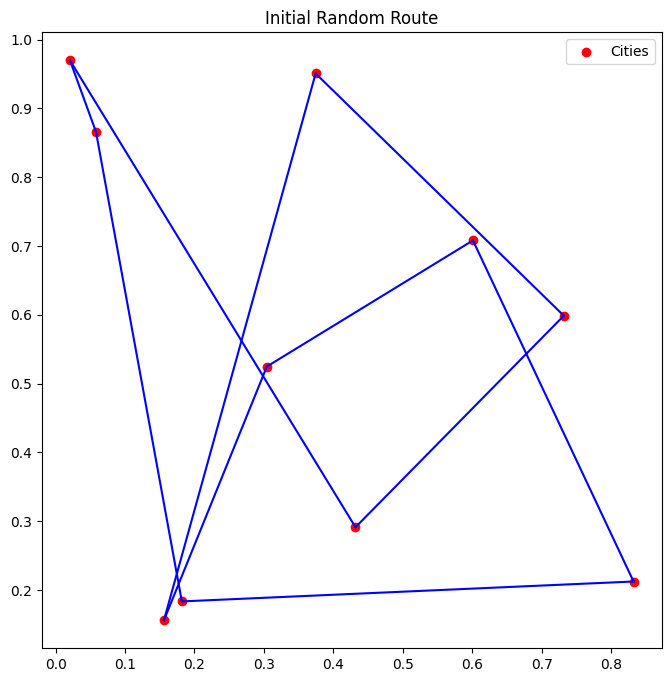

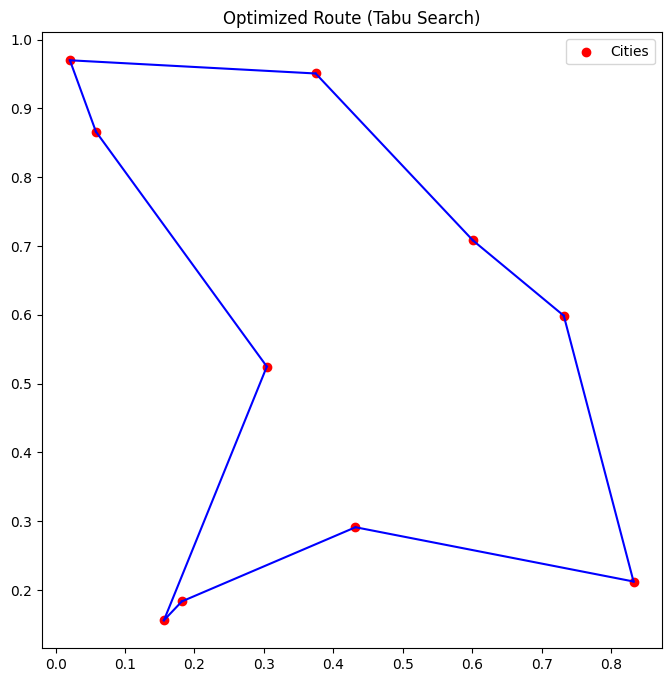

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
import random

# Create a set of cities (x, y coordinates) for the Traveling Salesman Problem
def generate_cities(num_cities, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_cities, 2)

# Calculate the total distance of the route
def total_distance(route, cities):
    distance = 0
    for i in range(len(route)):
        city_a = cities[route[i]]
        city_b = cities[route[(i + 1) % len(route)]]
        distance += np.linalg.norm(city_a - city_b)
    return distance

# Swap two cities in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm
def tabu_search(cities, max_iterations=100, tabu_size=10):
    num_cities = len(cities)
    current_route = list(range(num_cities))
    shuffle(current_route)  # Random initial route
    best_route = current_route
    best_distance = total_distance(current_route, cities)

    tabu_list = []
    iteration = 0

    while iteration < max_iterations:
        neighborhood = []

        # Generate neighborhood by swapping two cities
        for i in range(num_cities):
            for j in range(i + 1, num_cities):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)

        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')

        for neighbor in neighborhood:
            dist = total_distance(neighbor, cities)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor

        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance

        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance

        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        iteration += 1

    return best_route, best_distance

# Plot the cities and the routes
def plot_route(cities, route, title="Optimized Route"):
    plt.figure(figsize=(8, 8))
    plt.scatter(cities[:, 0], cities[:, 1], c='red', marker='o', label="Cities")
    
    # Plot the route
    for i in range(len(route)):
        city_a = cities[route[i]]
        city_b = cities[route[(i + 1) % len(route)]]
        plt.plot([city_a[0], city_b[0]], [city_a[1], city_b[1]], 'b-')
    
    plt.title(title)
    plt.legend()
    plt.show()

# Main function to run the Tabu Search and visualize the results
if __name__ == "__main__":
    num_cities = 10
    cities = generate_cities(num_cities)

    # Initial Route (Random)
    initial_route = list(range(num_cities))
    shuffle(initial_route)
    initial_distance = total_distance(initial_route, cities)

    print(f"Initial Distance: {initial_distance:.2f}")

    # Tabu Search Optimization
    best_route, best_distance = tabu_search(cities, max_iterations=100, tabu_size=10)

    print(f"Optimized Distance: {best_distance:.2f}")

    # Plot the initial and optimized routes
    plot_route(cities, initial_route, title="Initial Random Route")
    plot_route(cities, best_route, title="Optimized Route (Tabu Search)")


Initial Distance: 5.98 units
Optimized Distance: 2.90 units

Optimized Bus Schedule:
Stop 3: 08:00
Stop 5: 18:00
Stop 0: 28:00
Stop 4: 38:00
Stop 1: 48:00
Stop 6: 58:00
Stop 9: 68:00
Stop 7: 78:00
Stop 2: 88:00
Stop 8: 98:00


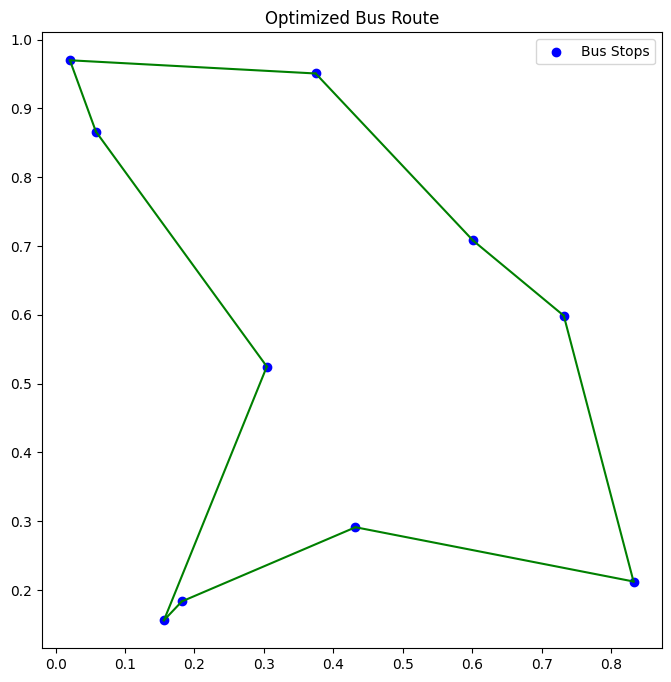

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

# Generate random bus stops (x, y coordinates)
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route
def total_distance(route, stops):
    distance = 0
    for i in range(len(route)):
        stop_a = stops[route[i]]
        stop_b = stops[route[(i + 1) % len(route)]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization
def tabu_search(stops, max_iterations=100, tabu_size=10):
    num_stops = len(stops)
    current_route = list(range(num_stops))
    shuffle(current_route)  # Random initial route
    best_route = current_route
    best_distance = total_distance(current_route, stops)

    tabu_list = []
    iteration = 0

    while iteration < max_iterations:
        neighborhood = []

        # Generate neighborhood by swapping two stops
        for i in range(num_stops):
            for j in range(i + 1, num_stops):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)

        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')

        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor

        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance

        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance

        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        iteration += 1

    return best_route, best_distance

# Create a schedule for the bus route
def create_schedule(route, num_stops, start_time, interval=10):
    schedule = {}
    current_time = start_time
    for stop in route:
        schedule[f'Stop {stop}'] = f'{current_time:02d}:00'
        current_time += interval
    return schedule

# Plot the bus stops and the optimized route
def plot_route(stops, route, title="Optimized Bus Route"):
    plt.figure(figsize=(8, 8))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")

    # Plot the optimized route
    for i in range(len(route)):
        stop_a = stops[route[i]]
        stop_b = stops[route[(i + 1) % len(route)]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'g-')

    plt.title(title)
    plt.legend()
    plt.show()

# Main function to run the route optimization and scheduling
if __name__ == "__main__":
    num_stops = 10
    bus_stops = generate_bus_stops(num_stops)

    # Initial random route
    initial_route = list(range(num_stops))
    shuffle(initial_route)
    initial_distance = total_distance(initial_route, bus_stops)

    print(f"Initial Distance: {initial_distance:.2f} units")

    # Optimize the bus route using Tabu Search
    best_route, best_distance = tabu_search(bus_stops, max_iterations=100, tabu_size=10)

    print(f"Optimized Distance: {best_distance:.2f} units")

    # Create a schedule for the optimized route
    start_time = 8  # Starting at 08:00 AM
    schedule = create_schedule(best_route, num_stops, start_time)

    # Print the schedule
    print("\nOptimized Bus Schedule:")
    for stop, time in schedule.items():
        print(f"{stop}: {time}")

    # Plot the optimized route
    plot_route(bus_stops, best_route, title="Optimized Bus Route")


Initial Distance: 5.15 units
Optimized Distance: 2.90 units

Optimized Bus Schedule:
Stop 9: 08:00
Stop 6: 18:00
Stop 1: 28:00
Stop 4: 38:00
Stop 0: 48:00
Stop 5: 58:00
Stop 3: 68:00
Stop 8: 78:00
Stop 2: 88:00
Stop 7: 98:00


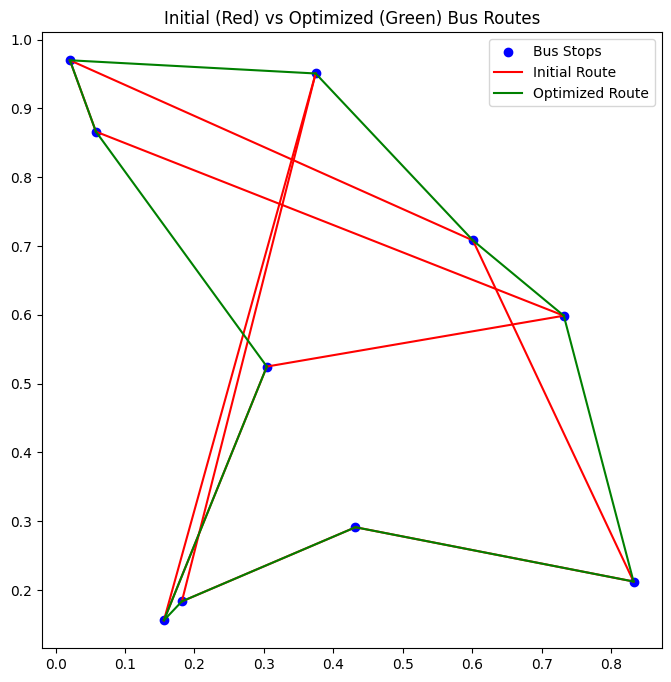

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

# Generate random bus stops (x, y coordinates)
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route
def total_distance(route, stops):
    distance = 0
    for i in range(len(route)):
        stop_a = stops[route[i]]
        stop_b = stops[route[(i + 1) % len(route)]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization
def tabu_search(stops, max_iterations=100, tabu_size=10):
    num_stops = len(stops)
    current_route = list(range(num_stops))
    shuffle(current_route)  # Random initial route
    best_route = current_route
    best_distance = total_distance(current_route, stops)

    tabu_list = []
    iteration = 0

    while iteration < max_iterations:
        neighborhood = []

        # Generate neighborhood by swapping two stops
        for i in range(num_stops):
            for j in range(i + 1, num_stops):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)

        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')

        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor

        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance

        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance

        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        iteration += 1

    return best_route, best_distance

# Create a schedule for the bus route
def create_schedule(route, num_stops, start_time, interval=10):
    schedule = {}
    current_time = start_time
    for stop in route:
        schedule[f'Stop {stop}'] = f'{current_time:02d}:00'
        current_time += interval
    return schedule

# Plot the bus stops and both the initial and optimized routes
def plot_routes(stops, initial_route, optimized_route, title="Initial vs Optimized Bus Routes"):
    plt.figure(figsize=(8, 8))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")

    # Plot the initial route in red
    for i in range(len(initial_route)):
        stop_a = stops[initial_route[i]]
        stop_b = stops[initial_route[(i + 1) % len(initial_route)]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'r-', label="Initial Route" if i == 0 else "")

    # Plot the optimized route in green
    for i in range(len(optimized_route)):
        stop_a = stops[optimized_route[i]]
        stop_b = stops[optimized_route[(i + 1) % len(optimized_route)]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'g-', label="Optimized Route" if i == 0 else "")

    plt.title(title)
    plt.legend()
    plt.show()

# Main function to run the route optimization and scheduling
if __name__ == "__main__":
    num_stops = 10
    bus_stops = generate_bus_stops(num_stops)

    # Initial random route
    initial_route = list(range(num_stops))
    shuffle(initial_route)
    initial_distance = total_distance(initial_route, bus_stops)

    print(f"Initial Distance: {initial_distance:.2f} units")

    # Optimize the bus route using Tabu Search
    best_route, best_distance = tabu_search(bus_stops, max_iterations=100, tabu_size=10)

    print(f"Optimized Distance: {best_distance:.2f} units")

    # Create a schedule for the optimized route
    start_time = 8  # Starting at 08:00 AM
    schedule = create_schedule(best_route, num_stops, start_time)

    # Print the schedule
    print("\nOptimized Bus Schedule:")
    for stop, time in schedule.items():
        print(f"{stop}: {time}")

    # Plot both the initial and optimized routes
    plot_routes(bus_stops, initial_route, best_route, title="Initial (Red) vs Optimized (Green) Bus Routes")


Initial Distance: 5.25 units
Optimized Distance: 2.87 units

Optimized Bus Schedule:
Stop 9: 08:00
Stop 7: 18:00
Stop 2: 28:00
Stop 8: 38:00
Stop 3: 48:00
Stop 5: 58:00
Stop 0: 68:00
Stop 4: 78:00
Stop 6: 88:00
Stop 1: 98:00


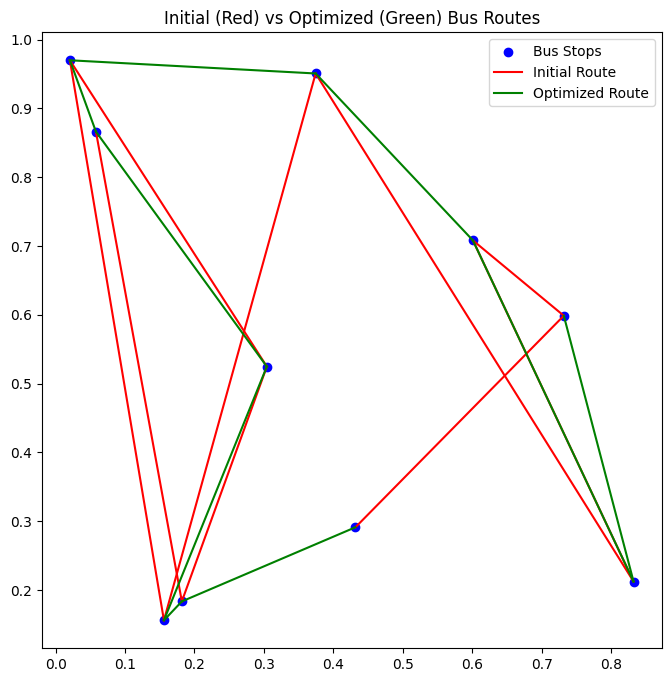

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

# Generate random bus stops (x, y coordinates)
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route (without closing the loop)
def total_distance(route, stops):
    distance = 0
    for i in range(len(route) - 1):  # No loop; doesn't go back to start
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization
def tabu_search(stops, max_iterations=100, tabu_size=10):
    num_stops = len(stops)
    current_route = list(range(num_stops))
    shuffle(current_route)  # Random initial route
    best_route = current_route
    best_distance = total_distance(current_route, stops)

    tabu_list = []
    iteration = 0

    while iteration < max_iterations:
        neighborhood = []

        # Generate neighborhood by swapping two stops
        for i in range(1, num_stops - 1):  # Avoid changing the start and end points
            for j in range(i + 1, num_stops - 1):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)

        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')

        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor

        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance

        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance

        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        iteration += 1

    return best_route, best_distance

# Create a schedule for the bus route (starting and ending at different stops)
def create_schedule(route, num_stops, start_time, interval=10):
    schedule = {}
    current_time = start_time
    for stop in route:
        schedule[f'Stop {stop}'] = f'{current_time:02d}:00'
        current_time += interval
    return schedule

# Plot the bus stops and both the initial and optimized routes
def plot_routes(stops, initial_route, optimized_route, title="Initial vs Optimized Bus Routes"):
    plt.figure(figsize=(8, 8))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")

    # Plot the initial route in red
    for i in range(len(initial_route) - 1):
        stop_a = stops[initial_route[i]]
        stop_b = stops[initial_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'r-', label="Initial Route" if i == 0 else "")

    # Plot the optimized route in green
    for i in range(len(optimized_route) - 1):
        stop_a = stops[optimized_route[i]]
        stop_b = stops[optimized_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'g-', label="Optimized Route" if i == 0 else "")

    plt.title(title)
    plt.legend()
    plt.show()

# Main function to run the route optimization and scheduling
if __name__ == "__main__":
    num_stops = 10
    bus_stops = generate_bus_stops(num_stops)

    # Initial random route with distinct start and end
    initial_route = list(range(num_stops))
    shuffle(initial_route)
    initial_distance = total_distance(initial_route, bus_stops)

    print(f"Initial Distance: {initial_distance:.2f} units")

    # Optimize the bus route using Tabu Search
    best_route, best_distance = tabu_search(bus_stops, max_iterations=100, tabu_size=10)

    print(f"Optimized Distance: {best_distance:.2f} units")

    # Create a schedule for the optimized route
    start_time = 8  # Starting at 08:00 AM
    schedule = create_schedule(best_route, num_stops, start_time)

    # Print the schedule
    print("\nOptimized Bus Schedule:")
    for stop, time in schedule.items():
        print(f"{stop}: {time}")

    # Plot both the initial and optimized routes (distinct start and end)
    plot_routes(bus_stops, initial_route, best_route, title="Initial (Red) vs Optimized (Green) Bus Routes")


Initial Distance: 5.40 units
Optimized Distance: 2.72 units

Optimized Bus Schedule:
Stop 2: 08:00
Stop 7: 18:00
Stop 9: 28:00
Stop 6: 38:00
Stop 8: 48:00
Stop 3: 58:00
Stop 5: 68:00
Stop 0: 78:00
Stop 4: 88:00
Stop 1: 98:00


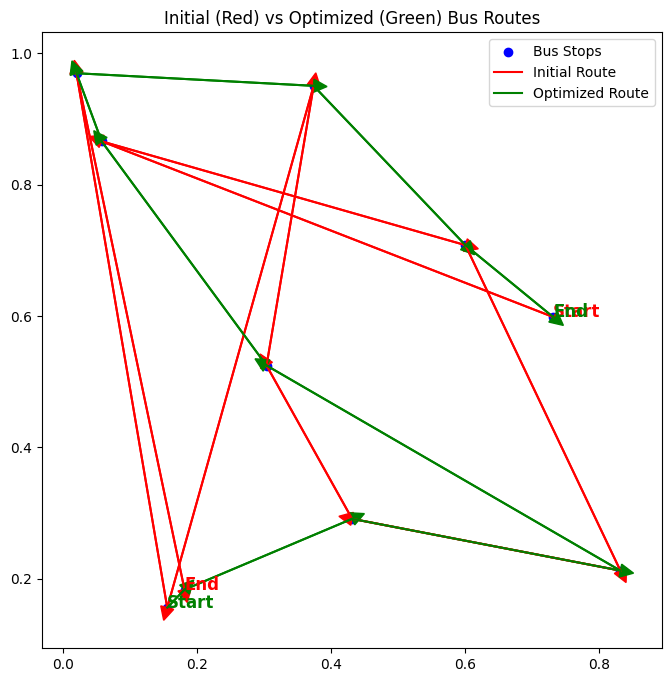

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

# Generate random bus stops (x, y coordinates)
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route (without closing the loop)
def total_distance(route, stops):
    distance = 0
    for i in range(len(route) - 1):  # No loop; doesn't go back to start
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization
def tabu_search(stops, max_iterations=100, tabu_size=10):
    num_stops = len(stops)
    current_route = list(range(num_stops))
    shuffle(current_route)  # Random initial route
    best_route = current_route
    best_distance = total_distance(current_route, stops)

    tabu_list = []
    iteration = 0

    while iteration < max_iterations:
        neighborhood = []

        # Generate neighborhood by swapping two stops
        for i in range(1, num_stops - 1):  # Avoid changing the start and end points
            for j in range(i + 1, num_stops - 1):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)

        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')

        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor

        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance

        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance

        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        iteration += 1

    return best_route, best_distance

# Create a schedule for the bus route (starting and ending at different stops)
def create_schedule(route, num_stops, start_time, interval=10):
    schedule = {}
    current_time = start_time
    for stop in route:
        schedule[f'Stop {stop}'] = f'{current_time:02d}:00'
        current_time += interval
    return schedule

# Plot the bus stops, the routes, and show arrows with start and end stops marked
def plot_routes(stops, initial_route, optimized_route, title="Initial vs Optimized Bus Routes"):
    plt.figure(figsize=(8, 8))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")

    # Mark the start and end stops for both routes
    plt.text(stops[initial_route[0], 0], stops[initial_route[0], 1], "Start", color='red', fontsize=12, fontweight='bold')
    plt.text(stops[initial_route[-1], 0], stops[initial_route[-1], 1], "End", color='red', fontsize=12, fontweight='bold')

    # Plot the initial route with arrows
    for i in range(len(initial_route) - 1):
        stop_a = stops[initial_route[i]]
        stop_b = stops[initial_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'r-', label="Initial Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], head_width=0.02, head_length=0.02, fc='r', ec='r')

    # Mark the start and end stops for the optimized route
    plt.text(stops[optimized_route[0], 0], stops[optimized_route[0], 1], "Start", color='green', fontsize=12, fontweight='bold')
    plt.text(stops[optimized_route[-1], 0], stops[optimized_route[-1], 1], "End", color='green', fontsize=12, fontweight='bold')

    # Plot the optimized route with arrows
    for i in range(len(optimized_route) - 1):
        stop_a = stops[optimized_route[i]]
        stop_b = stops[optimized_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'g-', label="Optimized Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], head_width=0.02, head_length=0.02, fc='g', ec='g')

    plt.title(title)
    plt.legend()
    plt.show()

# Main function to run the route optimization and scheduling
if __name__ == "__main__":
    num_stops = 10
    bus_stops = generate_bus_stops(num_stops)

    # Initial random route with distinct start and end
    initial_route = list(range(num_stops))
    shuffle(initial_route)
    initial_distance = total_distance(initial_route, bus_stops)

    print(f"Initial Distance: {initial_distance:.2f} units")

    # Optimize the bus route using Tabu Search
    best_route, best_distance = tabu_search(bus_stops, max_iterations=100, tabu_size=10)

    print(f"Optimized Distance: {best_distance:.2f} units")

    # Create a schedule for the optimized route
    start_time = 8  # Starting at 08:00 AM
    schedule = create_schedule(best_route, num_stops, start_time)

    # Print the schedule
    print("\nOptimized Bus Schedule:")
    for stop, time in schedule.items():
        print(f"{stop}: {time}")

    # Plot both the initial and optimized routes with start/end stops marked
    plot_routes(bus_stops, initial_route, best_route, title="Initial (Red) vs Optimized (Green) Bus Routes")


Optimized Distance: 2.76 units


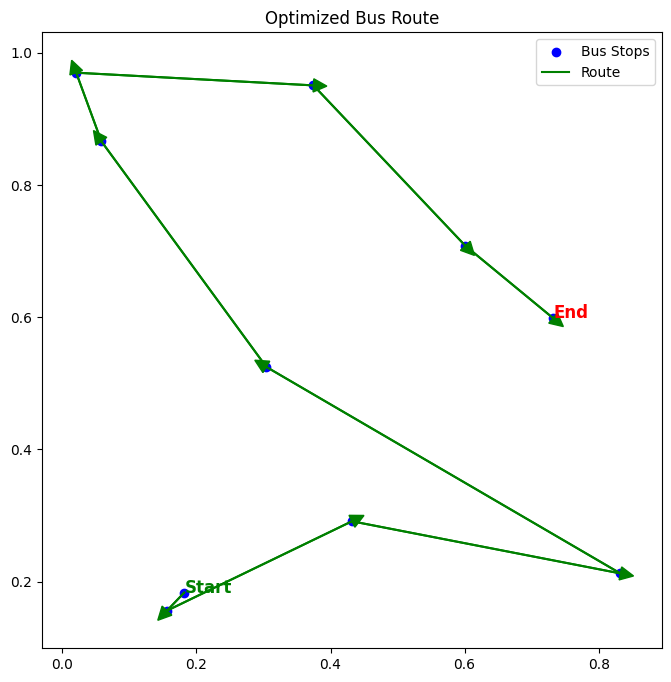

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

# Generate random bus stops (x, y coordinates)
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route (without closing the loop)
def total_distance(route, stops):
    distance = 0
    for i in range(len(route) - 1):  # No loop; doesn't go back to start
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization
def tabu_search(stops, max_iterations=100, tabu_size=10):
    num_stops = len(stops)
    current_route = list(range(num_stops))
    shuffle(current_route)  # Random initial route
    best_route = current_route
    best_distance = total_distance(current_route, stops)

    tabu_list = []
    iteration = 0

    while iteration < max_iterations:
        neighborhood = []

        # Generate neighborhood by swapping two stops
        for i in range(1, num_stops - 1):  # Avoid changing the start and end points
            for j in range(i + 1, num_stops - 1):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)

        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')

        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor

        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance

        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance

        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        iteration += 1

    return best_route, best_distance

# Plot the bus stops, the route, and show arrows with start and end stops marked
def plot_route(stops, route, title="Optimized Bus Route"):
    plt.figure(figsize=(8, 8))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")

    # Mark the start and end stops
    plt.text(stops[route[0], 0], stops[route[0], 1], "Start", color='green', fontsize=12, fontweight='bold')
    plt.text(stops[route[-1], 0], stops[route[-1], 1], "End", color='red', fontsize=12, fontweight='bold')

    # Plot the route with arrows
    for i in range(len(route) - 1):
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'g-', label="Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.02, head_length=0.02, fc='green', ec='green')

    plt.title(title)
    plt.legend()
    plt.show()

# Main function to run the route optimization
if __name__ == "__main__":
    num_stops = 10
    bus_stops = generate_bus_stops(num_stops)

    # Random initial route with distinct start and end
    initial_route = list(range(num_stops))
    shuffle(initial_route)

    # Optimize the bus route using Tabu Search
    best_route, best_distance = tabu_search(bus_stops, max_iterations=100, tabu_size=10)

    print(f"Optimized Distance: {best_distance:.2f} units")

    # Plot the optimized route with start/end stops marked
    plot_route(bus_stops, best_route, title="Optimized Bus Route")


Initial Distance: 4.33 units
Optimized Distance: 2.56 units


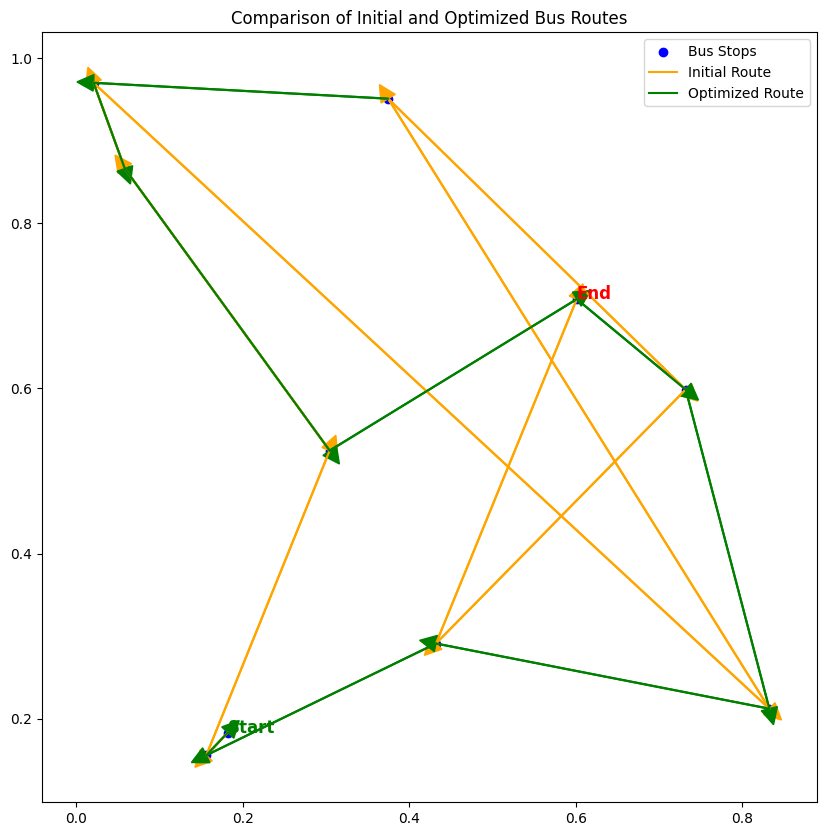

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

# Generate random bus stops (x, y coordinates)
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route (without closing the loop)
def total_distance(route, stops):
    distance = 0
    for i in range(len(route) - 1):  # No loop; doesn't go back to start
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization
def tabu_search(stops, max_iterations=100, tabu_size=10):
    num_stops = len(stops)
    current_route = list(range(num_stops))
    shuffle(current_route)  # Random initial route
    best_route = current_route
    best_distance = total_distance(current_route, stops)

    tabu_list = []
    iteration = 0

    while iteration < max_iterations:
        neighborhood = []

        # Generate neighborhood by swapping two stops
        for i in range(1, num_stops - 1):  # Avoid changing the start and end points
            for j in range(i + 1, num_stops - 1):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)

        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')

        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor

        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance

        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance

        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        iteration += 1

    return best_route, best_distance

# Plot the initial and optimized routes on the same plot
def plot_routes(stops, initial_route, optimized_route):
    plt.figure(figsize=(10, 10))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")

    # Mark the start and end stops
    plt.text(stops[initial_route[0], 0], stops[initial_route[0], 1], "Start", color='green', fontsize=12, fontweight='bold')
    plt.text(stops[initial_route[-1], 0], stops[initial_route[-1], 1], "End", color='red', fontsize=12, fontweight='bold')

    # Plot the initial route with arrows
    for i in range(len(initial_route) - 1):
        stop_a = stops[initial_route[i]]
        stop_b = stops[initial_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'orange', label="Initial Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.02, head_length=0.02, fc='orange', ec='orange')

    # Plot the optimized route with arrows
    for i in range(len(optimized_route) - 1):
        stop_a = stops[optimized_route[i]]
        stop_b = stops[optimized_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'green', label="Optimized Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.02, head_length=0.02, fc='green', ec='green')

    plt.title("Comparison of Initial and Optimized Bus Routes")
    plt.legend()
    plt.show()

# Main function to run the route optimization
if __name__ == "__main__":
    num_stops = 10
    bus_stops = generate_bus_stops(num_stops)

    # Random initial route with distinct start and end
    initial_route = list(range(num_stops))
    shuffle(initial_route)

    # Optimize the bus route using Tabu Search
    optimized_route, optimized_distance = tabu_search(bus_stops, max_iterations=100, tabu_size=10)

    print(f"Initial Distance: {total_distance(initial_route, bus_stops):.2f} units")
    print(f"Optimized Distance: {optimized_distance:.2f} units")

    # Plot both the initial and optimized routes
    plot_routes(bus_stops, initial_route, optimized_route)


Initial Distance: 5.48 units
Optimized Distance: 2.40 units


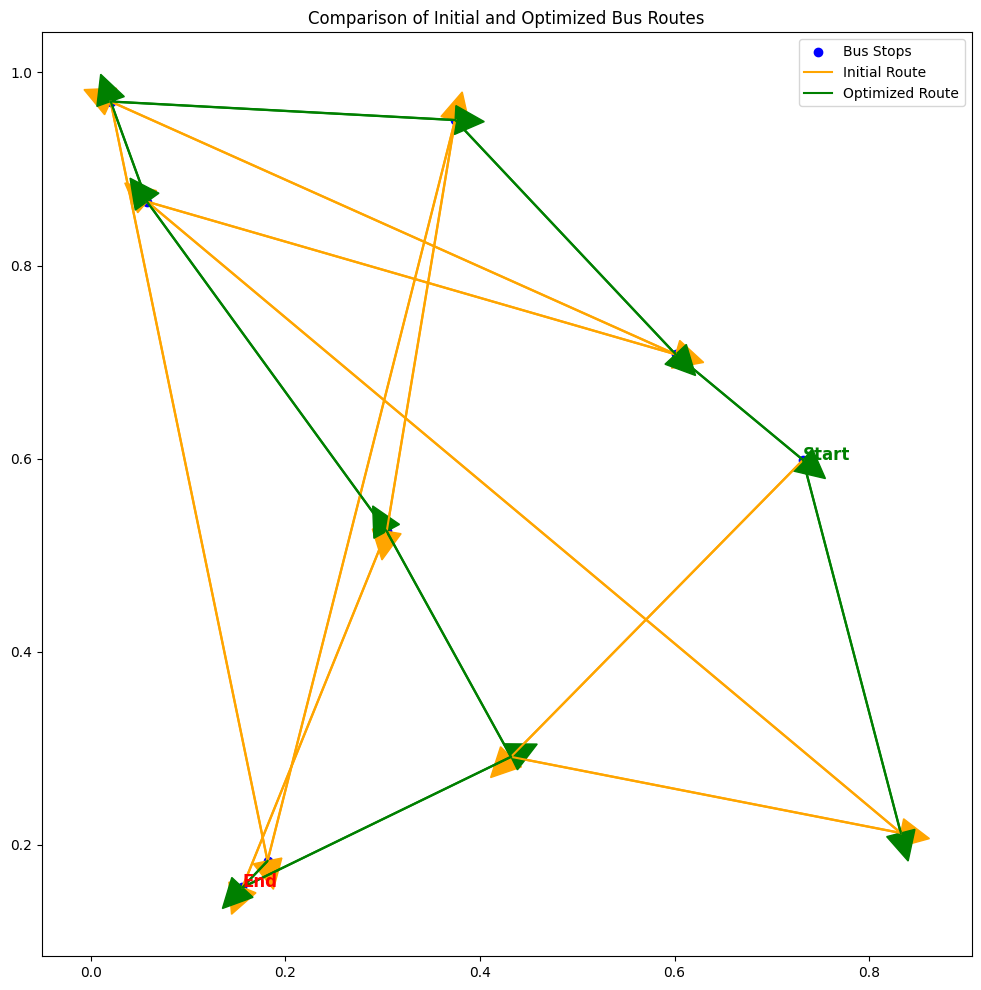

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

# Generate random bus stops (x, y coordinates)
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route (without closing the loop)
def total_distance(route, stops):
    distance = 0
    for i in range(len(route) - 1):  # No loop; doesn't go back to start
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization
def tabu_search(stops, max_iterations=100, tabu_size=10):
    num_stops = len(stops)
    current_route = list(range(num_stops))
    shuffle(current_route)  # Random initial route
    best_route = current_route
    best_distance = total_distance(current_route, stops)

    tabu_list = []
    iteration = 0

    while iteration < max_iterations:
        neighborhood = []

        # Generate neighborhood by swapping two stops
        for i in range(1, num_stops - 1):  # Avoid changing the start and end points
            for j in range(i + 1, num_stops - 1):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)

        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')

        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor

        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance

        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance

        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        iteration += 1

    return best_route, best_distance

# Plot the initial and optimized routes on the same plot with direction arrows
def plot_routes(stops, initial_route, optimized_route):
    plt.figure(figsize=(12, 12))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")

    # Mark the start and end stops
    plt.text(stops[initial_route[0], 0], stops[initial_route[0], 1], "Start", color='green', fontsize=12, fontweight='bold')
    plt.text(stops[initial_route[-1], 0], stops[initial_route[-1], 1], "End", color='red', fontsize=12, fontweight='bold')

    # Plot the initial route with arrows
    for i in range(len(initial_route) - 1):
        stop_a = stops[initial_route[i]]
        stop_b = stops[initial_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'orange', label="Initial Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.03, head_length=0.03, fc='orange', ec='orange')

    # Plot the optimized route with arrows
    for i in range(len(optimized_route) - 1):
        stop_a = stops[optimized_route[i]]
        stop_b = stops[optimized_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'green', label="Optimized Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.03, head_length=0.03, fc='green', ec='green')

    plt.title("Comparison of Initial and Optimized Bus Routes")
    plt.legend()
    plt.show()

# Main function to run the route optimization
if __name__ == "__main__":
    num_stops = 10
    bus_stops = generate_bus_stops(num_stops)

    # Random initial route with distinct start and end
    initial_route = list(range(num_stops))
    shuffle(initial_route)

    # Optimize the bus route using Tabu Search
    optimized_route, optimized_distance = tabu_search(bus_stops, max_iterations=100, tabu_size=10)

    print(f"Initial Distance: {total_distance(initial_route, bus_stops):.2f} units")
    print(f"Optimized Distance: {optimized_distance:.2f} units")

    # Plot both the initial and optimized routes
    plot_routes(bus_stops, initial_route, optimized_route)


Initial Distance: 3.48 units
Optimized Distance: 2.58 units


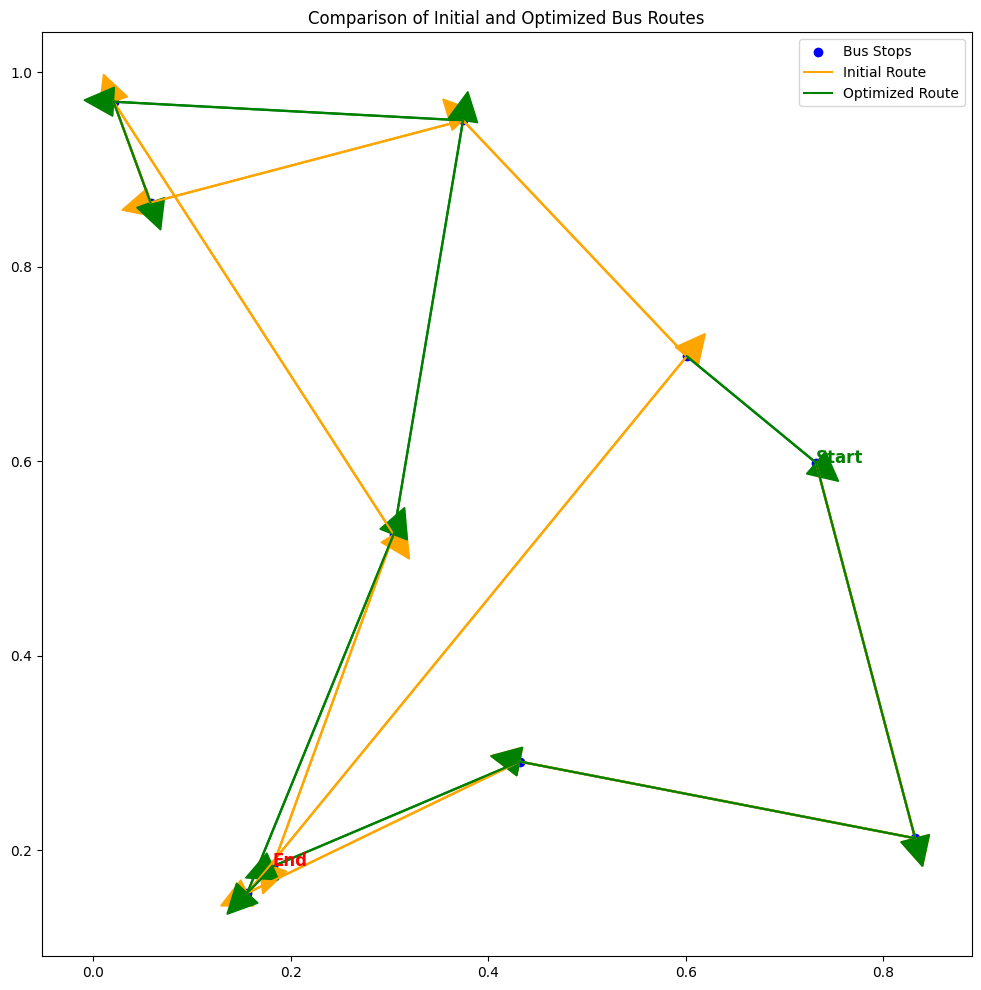

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

# Generate random bus stops (x, y coordinates)
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route (without closing the loop)
def total_distance(route, stops):
    distance = 0
    for i in range(len(route) - 1):  # No loop; doesn't go back to start
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization
def tabu_search(stops, max_iterations=100, tabu_size=10):
    num_stops = len(stops)
    current_route = list(range(num_stops))
    shuffle(current_route)  # Random initial route
    best_route = current_route
    best_distance = total_distance(current_route, stops)

    tabu_list = []
    iteration = 0

    while iteration < max_iterations:
        neighborhood = []

        # Generate neighborhood by swapping two stops
        for i in range(1, num_stops - 1):  # Avoid changing the start and end points
            for j in range(i + 1, num_stops - 1):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)

        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')

        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor

        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance

        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance

        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)

        iteration += 1

    return best_route, best_distance

# Plot the initial and optimized routes on the same plot with direction arrows
def plot_routes(stops, initial_route, optimized_route):
    plt.figure(figsize=(12, 12))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")

    # Mark the start and end stops
    plt.text(stops[initial_route[0], 0], stops[initial_route[0], 1], "Start", color='green', fontsize=12, fontweight='bold')
    plt.text(stops[initial_route[-1], 0], stops[initial_route[-1], 1], "End", color='red', fontsize=12, fontweight='bold')

    # Plot the initial route with arrows
    for i in range(len(initial_route) - 1):
        stop_a = stops[initial_route[i]]
        stop_b = stops[initial_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'orange', label="Initial Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.03, head_length=0.03, fc='orange', ec='orange')

    # Plot the optimized route with arrows
    for i in range(len(optimized_route) - 1):
        stop_a = stops[optimized_route[i]]
        stop_b = stops[optimized_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'green', label="Optimized Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.03, head_length=0.03, fc='green', ec='green')

    plt.title("Comparison of Initial and Optimized Bus Routes")
    plt.legend()
    plt.show()

# Main function to run the route optimization
if __name__ == "__main__":
    num_stops = 10
    bus_stops = generate_bus_stops(num_stops)

    # Random initial route with distinct start and end
    initial_route = list(range(num_stops))
    shuffle(initial_route)

    # Optimize the bus route using Tabu Search
    optimized_route, optimized_distance = tabu_search(bus_stops, max_iterations=100, tabu_size=10)

    print(f"Initial Distance: {total_distance(initial_route, bus_stops):.2f} units")
    print(f"Optimized Distance: {optimized_distance:.2f} units")

    # Plot both the initial and optimized routes
    plot_routes(bus_stops, initial_route, optimized_route)


Initial Distance: 5.54 units
Optimized Distance: 2.79 units


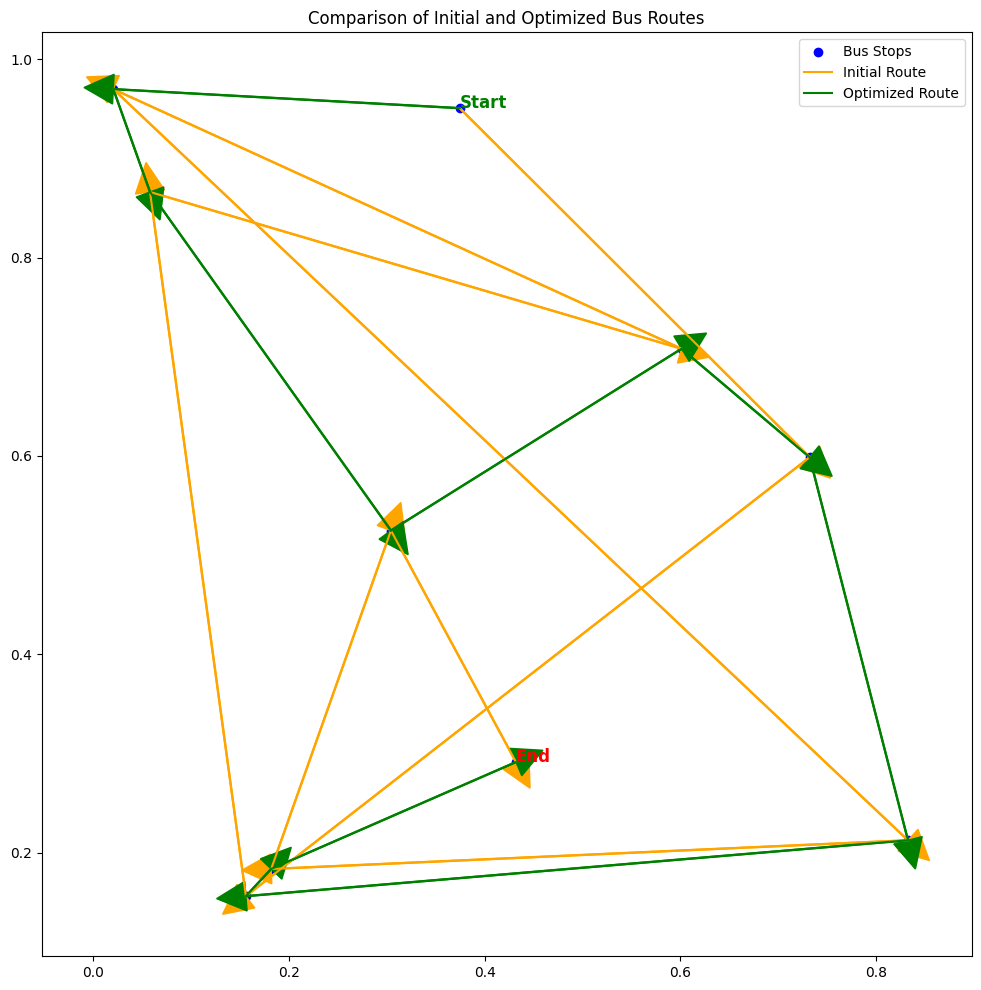

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

# Generate random bus stops (x, y coordinates), including start and end points
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route
def total_distance(route, stops):
    distance = 0
    for i in range(len(route) - 1):
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization
def tabu_search(stops, start_idx, end_idx, max_iterations=10000000000, tabu_size=10):
    num_stops = len(stops)
    
    # Initial route
    initial_route = list(range(num_stops))
    initial_route.remove(start_idx)
    initial_route.remove(end_idx)
    initial_route = [start_idx] + initial_route + [end_idx]
    
    current_route = initial_route.copy()
    best_route = current_route
    best_distance = total_distance(current_route, stops)
    
    tabu_list = []
    iteration = 0
    
    while iteration < max_iterations:
        neighborhood = []
        
        # Generate neighborhood by swapping two stops
        for i in range(1, num_stops - 2):  # Avoid changing start and end points
            for j in range(i + 1, num_stops - 1):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)
        
        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')
        
        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor
        
        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance
        
        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance
        
        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)
        
        iteration += 1
    
    return best_route, best_distance

# Plot the initial and optimized routes on the same plot with direction arrows
def plot_routes(stops, initial_route, optimized_route, start_idx, end_idx):
    plt.figure(figsize=(12, 12))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")
    
    # Mark the start and end stops
    plt.text(stops[start_idx, 0], stops[start_idx, 1], "Start", color='green', fontsize=12, fontweight='bold')
    plt.text(stops[end_idx, 0], stops[end_idx, 1], "End", color='red', fontsize=12, fontweight='bold')
    
    # Plot the initial route with arrows
    for i in range(len(initial_route) - 1):
        stop_a = stops[initial_route[i]]
        stop_b = stops[initial_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'orange', label="Initial Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.03, head_length=0.03, fc='orange', ec='orange')
    
    # Plot the optimized route with arrows
    for i in range(len(optimized_route) - 1):
        stop_a = stops[optimized_route[i]]
        stop_b = stops[optimized_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'green', label="Optimized Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.03, head_length=0.03, fc='green', ec='green')
    
    plt.title("Comparison of Initial and Optimized Bus Routes")
    plt.legend()
    plt.show()

# Main function to run the route optimization
if __name__ == "__main__":
    num_stops = 10
    bus_stops = generate_bus_stops(num_stops)

    # Define start and end points
    start_idx = 0
    end_idx = num_stops - 1

    # Random initial route with start and end points
    initial_route = [start_idx] + list(range(1, num_stops - 1)) + [end_idx]

    # Optimize the bus route using Tabu Search
    optimized_route, optimized_distance = tabu_search(bus_stops, start_idx, end_idx, max_iterations=100, tabu_size=10)
    initial_distance = total_distance(initial_route, bus_stops)

    print(f"Initial Distance: {initial_distance:.2f} units")
    print(f"Optimized Distance: {optimized_distance:.2f} units")

    # Plot both the initial and optimized routes
    plot_routes(bus_stops, initial_route, optimized_route, start_idx, end_idx)


Initial Distance: 3.15 units
Optimized Distance: 2.06 units


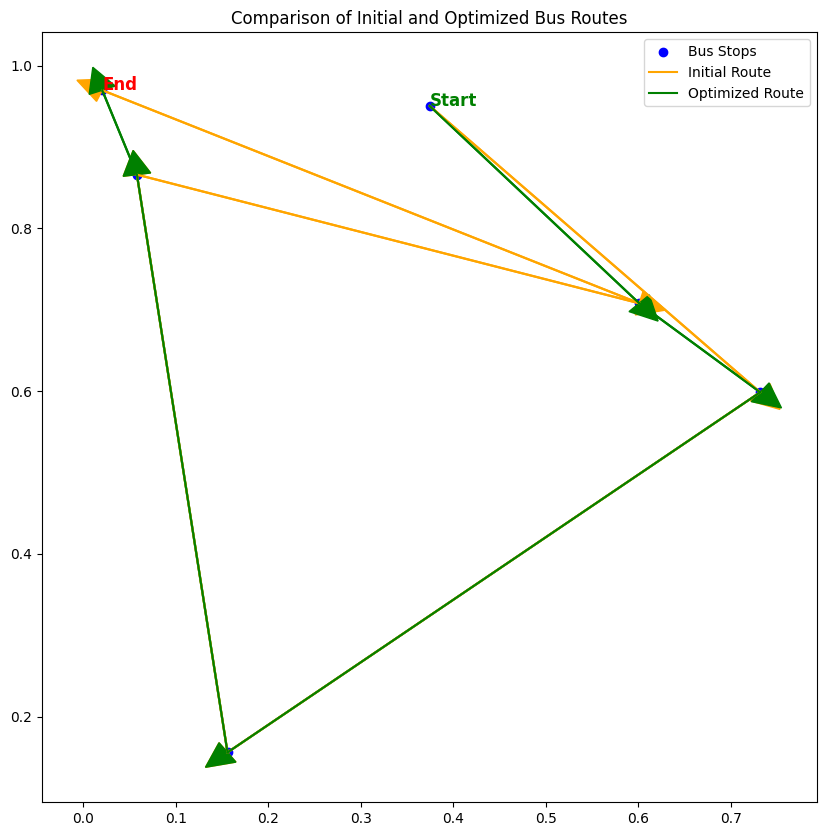

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

# Generate random bus stops (x, y coordinates) with fewer stops
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route
def total_distance(route, stops):
    distance = 0
    for i in range(len(route) - 1):
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization
def tabu_search(stops, start_idx, end_idx, max_iterations=1000000, tabu_size=1000):
    num_stops = len(stops)
    
    # Initial route
    initial_route = list(range(num_stops))
    initial_route.remove(start_idx)
    initial_route.remove(end_idx)
    initial_route = [start_idx] + initial_route + [end_idx]
    
    current_route = initial_route.copy()
    best_route = current_route
    best_distance = total_distance(current_route, stops)
    
    tabu_list = []
    iteration = 0
    
    while iteration < max_iterations:
        neighborhood = []
        
        # Generate neighborhood by swapping two stops
        for i in range(1, num_stops - 2):  # Avoid changing start and end points
            for j in range(i + 1, num_stops - 1):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)
        
        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')
        
        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor
        
        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance
        
        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance
        
        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)
        
        iteration += 1
    
    return best_route, best_distance

# Plot the initial and optimized routes on the same plot with direction arrows
def plot_routes(stops, initial_route, optimized_route, start_idx, end_idx):
    plt.figure(figsize=(10, 10))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")
    
    # Mark the start and end stops
    plt.text(stops[start_idx, 0], stops[start_idx, 1], "Start", color='green', fontsize=12, fontweight='bold')
    plt.text(stops[end_idx, 0], stops[end_idx, 1], "End", color='red', fontsize=12, fontweight='bold')
    
    # Plot the initial route with arrows
    for i in range(len(initial_route) - 1):
        stop_a = stops[initial_route[i]]
        stop_b = stops[initial_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'orange', label="Initial Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.03, head_length=0.03, fc='orange', ec='orange')
    
    # Plot the optimized route with arrows
    for i in range(len(optimized_route) - 1):
        stop_a = stops[optimized_route[i]]
        stop_b = stops[optimized_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'green', label="Optimized Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.03, head_length=0.03, fc='green', ec='green')
    
    plt.title("Comparison of Initial and Optimized Bus Routes")
    plt.legend()
    plt.show()

# Main function to run the route optimization
if __name__ == "__main__":
    num_stops = 6  # Reduced number of stops for clarity
    bus_stops = generate_bus_stops(num_stops)

    # Define start and end points
    start_idx = 0
    end_idx = num_stops - 1

    # Random initial route with start and end points
    initial_route = [start_idx] + list(range(1, num_stops - 1)) + [end_idx]

    # Optimize the bus route using Tabu Search
    optimized_route, optimized_distance = tabu_search(bus_stops, start_idx, end_idx, max_iterations=100, tabu_size=10)
    initial_distance = total_distance(initial_route, bus_stops)

    print(f"Initial Distance: {initial_distance:.2f} units")
    print(f"Optimized Distance: {optimized_distance:.2f} units")

    # Plot both the initial and optimized routes
    plot_routes(bus_stops, initial_route, optimized_route, start_idx, end_idx)


Initial Distance: 3.15 units
Optimized Distance: 2.06 units


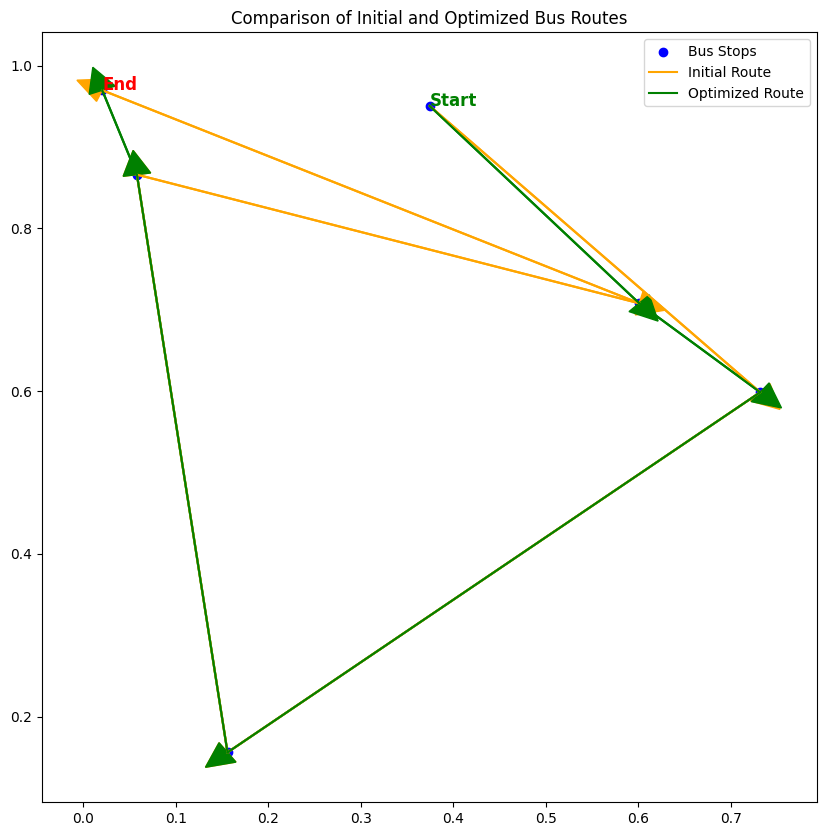

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle

# Generate random bus stops (x, y coordinates) with fewer stops
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route
def total_distance(route, stops):
    distance = 0
    for i in range(len(route) - 1):
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization
def tabu_search(stops, start_idx, end_idx, max_iterations=1000000, tabu_size=1000):
    num_stops = len(stops)
    
    # Initial route
    initial_route = list(range(num_stops))
    initial_route.remove(start_idx)
    initial_route.remove(end_idx)
    initial_route = [start_idx] + initial_route + [end_idx]
    
    current_route = initial_route.copy()
    best_route = current_route
    best_distance = total_distance(current_route, stops)
    
    tabu_list = []
    iteration = 0
    
    while iteration < max_iterations:
        neighborhood = []
        
        # Generate neighborhood by swapping two stops
        for i in range(1, num_stops - 2):  # Avoid changing start and end points
            for j in range(i + 1, num_stops - 1):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)
        
        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')
        
        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor
        
        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance
        
        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance
        
        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)
        
        iteration += 1
    
    return best_route, best_distance

# Plot the initial and optimized routes on the same plot with direction arrows
def plot_routes(stops, initial_route, optimized_route, start_idx, end_idx):
    plt.figure(figsize=(10, 10))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")
    
    # Mark the start and end stops
    plt.text(stops[start_idx, 0], stops[start_idx, 1], "Start", color='green', fontsize=12, fontweight='bold')
    plt.text(stops[end_idx, 0], stops[end_idx, 1], "End", color='red', fontsize=12, fontweight='bold')
    
    # Plot the initial route with arrows
    for i in range(len(initial_route) - 1):
        stop_a = stops[initial_route[i]]
        stop_b = stops[initial_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'orange', label="Initial Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.03, head_length=0.03, fc='orange', ec='orange')
    
    # Plot the optimized route with arrows
    for i in range(len(optimized_route) - 1):
        stop_a = stops[optimized_route[i]]
        stop_b = stops[optimized_route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'green', label="Optimized Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.03, head_length=0.03, fc='green', ec='green')
    
    plt.title("Comparison of Initial and Optimized Bus Routes")
    plt.legend()
    plt.show()

# Main function to run the route optimization
if __name__ == "__main__":
    num_stops = 6  # Reduced number of stops for clarity
    bus_stops = generate_bus_stops(num_stops)

    # Define start and end points
    start_idx = 0
    end_idx = num_stops - 1

    # Random initial route with start and end points
    initial_route = [start_idx] + list(range(1, num_stops - 1)) + [end_idx]

    # Optimize the bus route using Tabu Search
    optimized_route, optimized_distance = tabu_search(bus_stops, start_idx, end_idx, max_iterations=100, tabu_size=10)
    initial_distance = total_distance(initial_route, bus_stops)

    print(f"Initial Distance: {initial_distance:.2f} units")
    print(f"Optimized Distance: {optimized_distance:.2f} units")

    # Plot both the initial and optimized routes
    plot_routes(bus_stops, initial_route, optimized_route, start_idx, end_idx)


Initial Distance: 3.15 units
Optimized Distance: 2.06 units


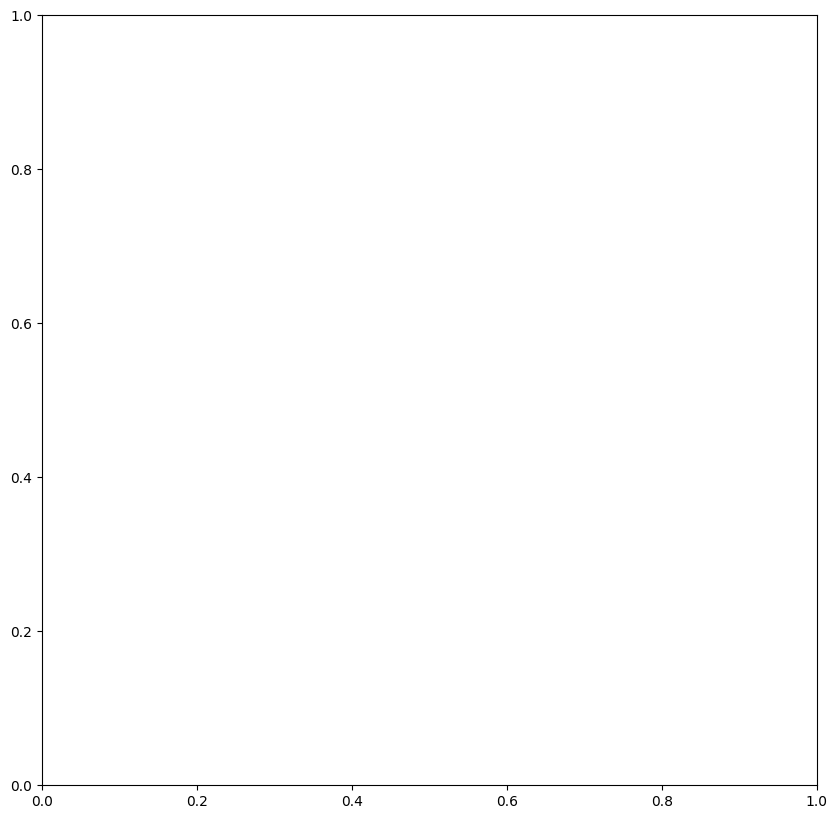

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import shuffle

# Generate random bus stops (x, y coordinates) with fewer stops
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route
def total_distance(route, stops):
    distance = 0
    for i in range(len(route) - 1):
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization with iteration tracking
def tabu_search_with_animation(stops, start_idx, end_idx, max_iterations=100, tabu_size=10):
    num_stops = len(stops)
    
    # Initial route
    initial_route = list(range(num_stops))
    initial_route.remove(start_idx)
    initial_route.remove(end_idx)
    initial_route = [start_idx] + initial_route + [end_idx]
    
    current_route = initial_route.copy()
    best_route = current_route
    best_distance = total_distance(current_route, stops)
    
    tabu_list = []
    iteration = 0
    
    routes = [current_route.copy()]
    
    while iteration < max_iterations:
        neighborhood = []
        
        # Generate neighborhood by swapping two stops
        for i in range(1, num_stops - 2):  # Avoid changing start and end points
            for j in range(i + 1, num_stops - 1):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)
        
        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')
        
        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor
        
        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance
        
        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance
        
        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)
        
        # Track routes for animation
        routes.append(current_route.copy())
        
        iteration += 1
    
    return best_route, best_distance, routes

# Plot the routes dynamically using animation
def animate_routes(routes, stops, start_idx, end_idx):
    fig, ax = plt.subplots(figsize=(10, 10))
    
    def update(num):
        ax.clear()
        ax.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")
        
        # Mark the start and end stops
        ax.text(stops[start_idx, 0], stops[start_idx, 1], "Start", color='green', fontsize=12, fontweight='bold')
        ax.text(stops[end_idx, 0], stops[end_idx, 1], "End", color='red', fontsize=12, fontweight='bold')
        
        # Plot the route up to the current iteration
        if num > 0:
            route = routes[num]
            for i in range(len(route) - 1):
                stop_a = stops[route[i]]
                stop_b = stops[route[i + 1]]
                ax.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'green', lw=2)
                ax.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                         head_width=0.03, head_length=0.03, fc='green', ec='green')
        
        ax.set_title(f"Iteration: {num + 1}")
        ax.legend()
        ax.grid(True)
    
    ani = animation.FuncAnimation(fig, update, frames=len(routes), repeat=False)
    plt.show()

# Main function to run the route optimization with animation
if __name__ == "__main__":
    num_stops = 6  # Reduced number of stops for clarity
    bus_stops = generate_bus_stops(num_stops)

    # Define start and end points
    start_idx = 0
    end_idx = num_stops - 1

    # Optimize the bus route using Tabu Search
    best_route, best_distance, routes = tabu_search_with_animation(bus_stops, start_idx, end_idx, max_iterations=100, tabu_size=10)
    initial_route = list(range(num_stops))
    initial_route.remove(start_idx)
    initial_route.remove(end_idx)
    initial_route = [start_idx] + initial_route + [end_idx]
    initial_distance = total_distance(initial_route, bus_stops)

    print(f"Initial Distance: {initial_distance:.2f} units")
    print(f"Optimized Distance: {best_distance:.2f} units")

    # Animate the route optimization process
    animate_routes(routes, bus_stops, start_idx, end_idx)


C:\Users\ACER\AppData\Local\Temp\ipykernel_27340\2130879409.py:102: UserWarning: frames=<generator object tabu_search at 0x000001CA00370EA0> which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig, update, frames=tabu_search(bus_stops, max_iters=50),


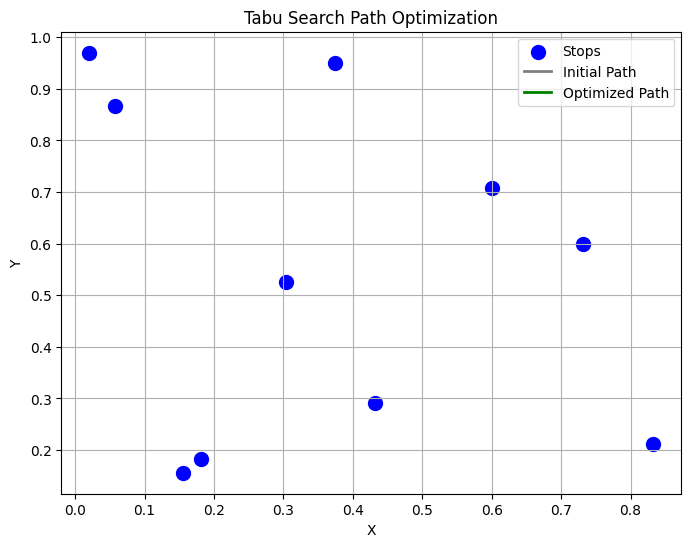

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Example data: coordinates of 10 bus stops
np.random.seed(42)
bus_stops = np.random.rand(10, 2)  # 10 random bus stops

# Function to calculate the total distance of a route
def calculate_route_distance(route, stops):
    dist = 0
    for i in range(len(route) - 1):
        dist += np.linalg.norm(stops[route[i]] - stops[route[i+1]])
    return dist

# Tabu Search optimization (simplified)
def tabu_search(stops, max_iters=100):
    n_stops = len(stops)
    # Start with a random initial route
    current_route = list(range(n_stops))
    np.random.shuffle(current_route)
    best_route = current_route.copy()
    best_distance = calculate_route_distance(current_route, stops)

    tabu_list = []
    tabu_tenure = 10  # Number of iterations to keep moves in tabu list

    for iteration in range(max_iters):
        # Generate neighborhood by swapping two stops
        neighborhood = []
        for i in range(n_stops):
            for j in range(i + 1, n_stops):
                neighbor = current_route.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                if (i, j) not in tabu_list:  # Avoid moves in tabu list
                    neighborhood.append(neighbor)

        # Select the best route in the neighborhood
        neighborhood_distances = [calculate_route_distance(route, stops) for route in neighborhood]
        best_neighbor_idx = np.argmin(neighborhood_distances)
        best_neighbor = neighborhood[best_neighbor_idx]
        best_neighbor_distance = neighborhood_distances[best_neighbor_idx]

        # Update the current route
        if best_neighbor_distance < best_distance:
            best_route = best_neighbor
            best_distance = best_neighbor_distance

        current_route = best_neighbor

        # Update tabu list
        tabu_list.append((i, j))
        if len(tabu_list) > tabu_tenure:
            tabu_list.pop(0)

        # Yield the current state for animation
        yield current_route, best_route, best_distance

# Initialize the figure for animation
fig, ax = plt.subplots(figsize=(8, 6))

# Draw bus stops as blue dots
ax.scatter(bus_stops[:, 0], bus_stops[:, 1], c='blue', s=100, label="Stops")

# Set labels and grid
ax.set_title('Tabu Search Path Optimization')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)

# Initialize lines for initial and optimized routes
initial_line, = ax.plot([], [], 'gray', lw=2, label="Initial Path")
optimized_line, = ax.plot([], [], 'green', lw=2, label="Optimized Path")

# Set up initial route for animation
initial_route = list(range(len(bus_stops)))
np.random.shuffle(initial_route)

# Function to initialize the animation
def init():
    initial_line.set_data([], [])
    optimized_line.set_data([], [])
    return initial_line, optimized_line

# Function to update the animation in each frame
def update(frame):
    current_route, best_route, best_distance = frame

    # Update the initial path
    initial_x = [bus_stops[stop][0] for stop in current_route]
    initial_y = [bus_stops[stop][1] for stop in current_route]
    initial_line.set_data(initial_x, initial_y)

    # Update the optimized path
    optimized_x = [bus_stops[stop][0] for stop in best_route]
    optimized_y = [bus_stops[stop][1] for stop in best_route]
    optimized_line.set_data(optimized_x, optimized_y)

    return initial_line, optimized_line

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=tabu_search(bus_stops, max_iters=50), 
                              init_func=init, blit=True, repeat=False)

# Display the plot
plt.legend()
plt.show()


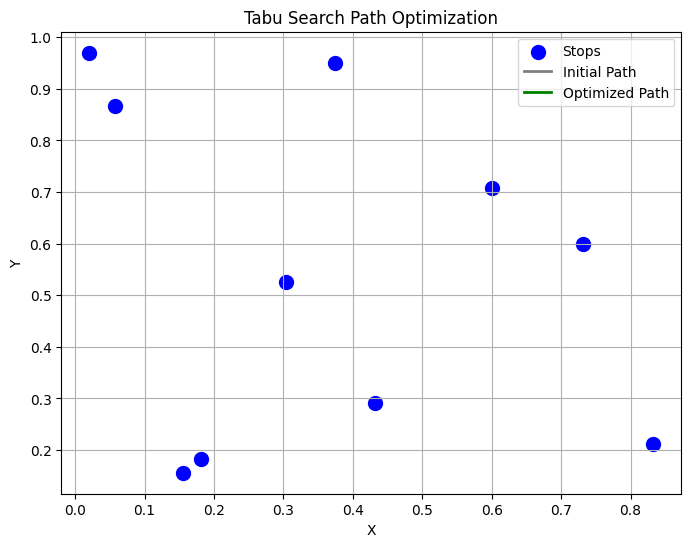

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Example data: coordinates of 10 bus stops
np.random.seed(42)
bus_stops = np.random.rand(10, 2)  # 10 random bus stops

# Function to calculate the total distance of a route
def calculate_route_distance(route, stops):
    dist = 0
    for i in range(len(route) - 1):
        dist += np.linalg.norm(stops[route[i]] - stops[route[i+1]])
    return dist

# Tabu Search optimization (simplified)
def tabu_search(stops, max_iters=100):
    n_stops = len(stops)
    # Start with a random initial route
    current_route = list(range(n_stops))
    np.random.shuffle(current_route)
    best_route = current_route.copy()
    best_distance = calculate_route_distance(current_route, stops)

    tabu_list = []
    tabu_tenure = 10  # Number of iterations to keep moves in tabu list

    for iteration in range(max_iters):
        # Generate neighborhood by swapping two stops
        neighborhood = []
        for i in range(n_stops):
            for j in range(i + 1, n_stops):
                neighbor = current_route.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                if (i, j) not in tabu_list:  # Avoid moves in tabu list
                    neighborhood.append(neighbor)

        # Select the best route in the neighborhood
        neighborhood_distances = [calculate_route_distance(route, stops) for route in neighborhood]
        best_neighbor_idx = np.argmin(neighborhood_distances)
        best_neighbor = neighborhood[best_neighbor_idx]
        best_neighbor_distance = neighborhood_distances[best_neighbor_idx]

        # Update the current route
        if best_neighbor_distance < best_distance:
            best_route = best_neighbor
            best_distance = best_neighbor_distance

        current_route = best_neighbor

        # Update tabu list
        tabu_list.append((i, j))
        if len(tabu_list) > tabu_tenure:
            tabu_list.pop(0)

        # Yield the current state for animation
        yield current_route, best_route, best_distance

# Initialize the figure for animation
fig, ax = plt.subplots(figsize=(8, 6))

# Draw bus stops as blue dots
ax.scatter(bus_stops[:, 0], bus_stops[:, 1], c='blue', s=100, label="Stops")

# Set labels and grid
ax.set_title('Tabu Search Path Optimization')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)

# Initialize lines for initial and optimized routes
initial_line, = ax.plot([], [], 'gray', lw=2, label="Initial Path")
optimized_line, = ax.plot([], [], 'green', lw=2, label="Optimized Path")

# Set up initial route for animation
initial_route = list(range(len(bus_stops)))
np.random.shuffle(initial_route)

# Function to initialize the animation
def init():
    initial_line.set_data([], [])
    optimized_line.set_data([], [])
    return initial_line, optimized_line

# Function to update the animation in each frame
def update(frame):
    current_route, best_route, best_distance = frame

    # Update the initial path
    initial_x = [bus_stops[stop][0] for stop in current_route]
    initial_y = [bus_stops[stop][1] for stop in current_route]
    initial_line.set_data(initial_x, initial_y)

    # Update the optimized path
    optimized_x = [bus_stops[stop][0] for stop in best_route]
    optimized_y = [bus_stops[stop][1] for stop in best_route]
    optimized_line.set_data(optimized_x, optimized_y)

    return initial_line, optimized_line

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=tabu_search(bus_stops, max_iters=50), 
                              init_func=init, blit=True, repeat=False, cache_frame_data=False, save_count=50)

# Display the plot
plt.legend()
plt.show()


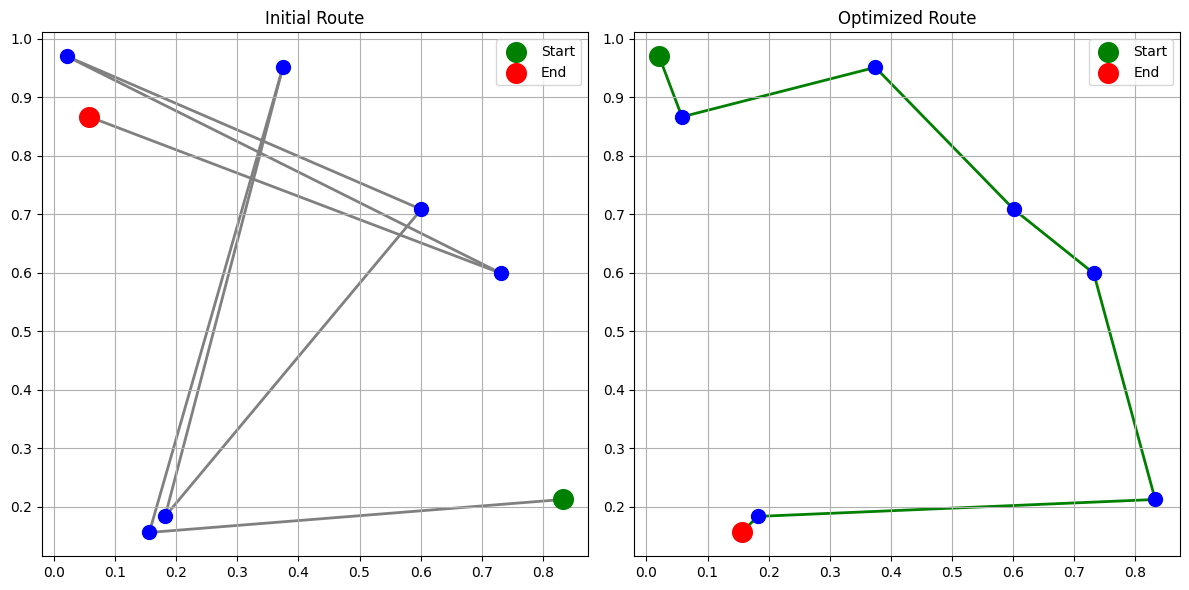

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Function to plot a route with arrows showing bus movement
def plot_route(stops, route, title, ax, color):
    ax.scatter(stops[:, 0], stops[:, 1], c='blue', s=100, zorder=2)
    for i in range(len(route) - 1):
        # Draw arrows from one stop to the next
        arrow = FancyArrowPatch(stops[route[i]], stops[route[i+1]], color=color, lw=2, arrowstyle='->')
        ax.add_patch(arrow)

    # Mark start and end points
    ax.scatter(stops[route[0], 0], stops[route[0], 1], c='green', s=200, label="Start", zorder=3)  # Start point
    ax.scatter(stops[route[-1], 0], stops[route[-1], 1], c='red', s=200, label="End", zorder=3)    # End point
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

# Function to calculate the total distance of a route
def calculate_route_distance(route, stops):
    dist = 0
    for i in range(len(route) - 1):
        dist += np.linalg.norm(stops[route[i]] - stops[route[i+1]])
    return dist

# Tabu Search optimization (simplified)
def tabu_search(stops, max_iters=100):
    n_stops = len(stops)
    # Start with a random initial route
    current_route = list(range(n_stops))
    np.random.shuffle(current_route)
    best_route = current_route.copy()
    best_distance = calculate_route_distance(current_route, stops)

    tabu_list = []
    tabu_tenure = 10  # Number of iterations to keep moves in tabu list

    for _ in range(max_iters):
        # Generate neighborhood by swapping two stops
        neighborhood = []
        for i in range(n_stops):
            for j in range(i + 1, n_stops):
                neighbor = current_route.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                if (i, j) not in tabu_list:  # Avoid moves in tabu list
                    neighborhood.append(neighbor)

        # Select the best route in the neighborhood
        neighborhood_distances = [calculate_route_distance(route, stops) for route in neighborhood]
        best_neighbor_idx = np.argmin(neighborhood_distances)
        best_neighbor = neighborhood[best_neighbor_idx]
        best_neighbor_distance = neighborhood_distances[best_neighbor_idx]

        # Update the current route
        if best_neighbor_distance < best_distance:
            best_route = best_neighbor
            best_distance = best_neighbor_distance

        current_route = best_neighbor

        # Update tabu list
        tabu_list.append((i, j))
        if len(tabu_list) > tabu_tenure:
            tabu_list.pop(0)

    return best_route

# Example data: coordinates of 10 bus stops, with one start and one destination
np.random.seed(42)
bus_stops = np.random.rand(8, 2)  # 8 random bus stops including start and end

# Initial and final routes
initial_route = list(range(len(bus_stops)))
np.random.shuffle(initial_route)

# Run Tabu Search to get the optimized route
optimized_route = tabu_search(bus_stops, max_iters=50)

# Plotting the initial and optimized routes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot initial route
plot_route(bus_stops, initial_route, "Initial Route", ax1, color='gray')

# Plot optimized route
plot_route(bus_stops, optimized_route, "Optimized Route", ax2, color='green')

plt.tight_layout()
plt.show()


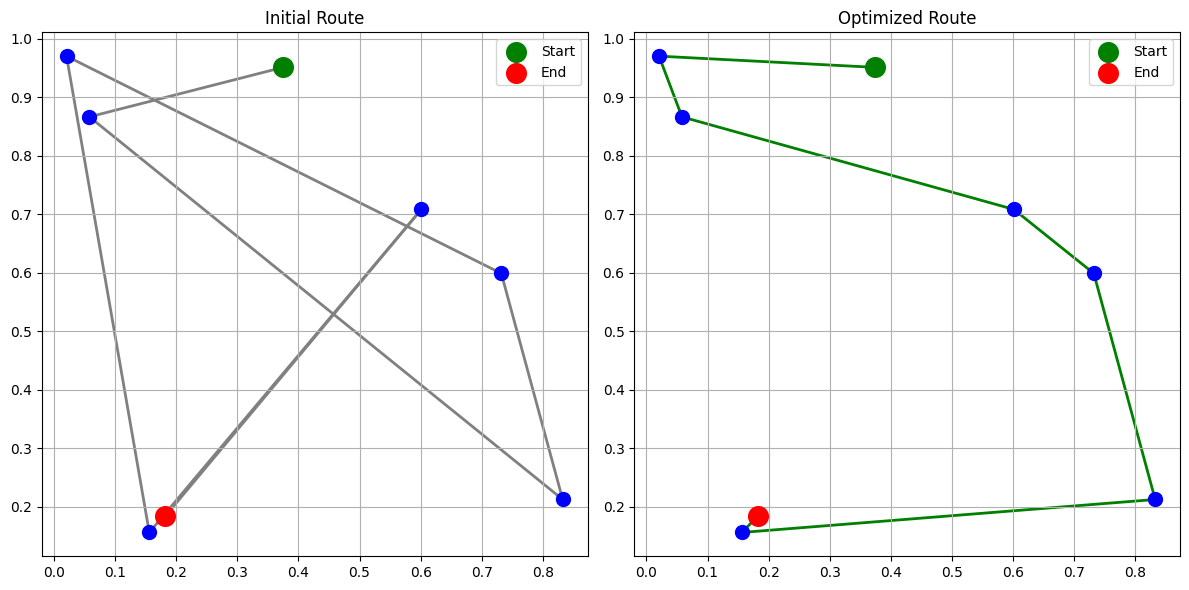

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Function to plot a route with arrows showing bus movement
def plot_route(stops, route, title, ax, color):
    ax.scatter(stops[:, 0], stops[:, 1], c='blue', s=100, zorder=2)
    for i in range(len(route) - 1):
        # Draw arrows from one stop to the next
        arrow = FancyArrowPatch(stops[route[i]], stops[route[i+1]], color=color, lw=2, arrowstyle='->')
        ax.add_patch(arrow)

    # Mark start and end points
    ax.scatter(stops[route[0], 0], stops[route[0], 1], c='green', s=200, label="Start", zorder=3)  # Start point
    ax.scatter(stops[route[-1], 0], stops[route[-1], 1], c='red', s=200, label="End", zorder=3)    # End point
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

# Function to calculate the total distance of a route
def calculate_route_distance(route, stops):
    dist = 0
    for i in range(len(route) - 1):
        dist += np.linalg.norm(stops[route[i]] - stops[route[i+1]])
    return dist

# Tabu Search optimization (simplified)
def tabu_search(stops, max_iters=100):
    n_stops = len(stops)
    # Start with a random initial route, keeping start and end fixed
    current_route = [0] + list(np.random.permutation(range(1, n_stops-1))) + [n_stops-1]
    best_route = current_route.copy()
    best_distance = calculate_route_distance(current_route, stops)

    tabu_list = []
    tabu_tenure = 10  # Number of iterations to keep moves in tabu list

    for _ in range(max_iters):
        # Generate neighborhood by swapping intermediate stops, keep start and end fixed
        neighborhood = []
        for i in range(1, n_stops-1):
            for j in range(i + 1, n_stops-1):
                neighbor = current_route.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                if (i, j) not in tabu_list:  # Avoid moves in tabu list
                    neighborhood.append(neighbor)

        # Select the best route in the neighborhood
        neighborhood_distances = [calculate_route_distance(route, stops) for route in neighborhood]
        best_neighbor_idx = np.argmin(neighborhood_distances)
        best_neighbor = neighborhood[best_neighbor_idx]
        best_neighbor_distance = neighborhood_distances[best_neighbor_idx]

        # Update the current route
        if best_neighbor_distance < best_distance:
            best_route = best_neighbor
            best_distance = best_neighbor_distance

        current_route = best_neighbor

        # Update tabu list
        tabu_list.append((i, j))
        if len(tabu_list) > tabu_tenure:
            tabu_list.pop(0)

    return best_route

# Example data: coordinates of 8 bus stops (fixed start and end points)
np.random.seed(42)
bus_stops = np.random.rand(8, 2)  # 8 random bus stops including start and end

# Initial and final routes
initial_route = [0] + list(np.random.permutation(range(1, len(bus_stops)-1))) + [len(bus_stops)-1]

# Run Tabu Search to get the optimized route
optimized_route = tabu_search(bus_stops, max_iters=50)

# Plotting the initial and optimized routes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot initial route with fixed start/end
plot_route(bus_stops, initial_route, "Initial Route", ax1, color='gray')

# Plot optimized route with fixed start/end
plot_route(bus_stops, optimized_route, "Optimized Route", ax2, color='green')

plt.tight_layout()
plt.show()


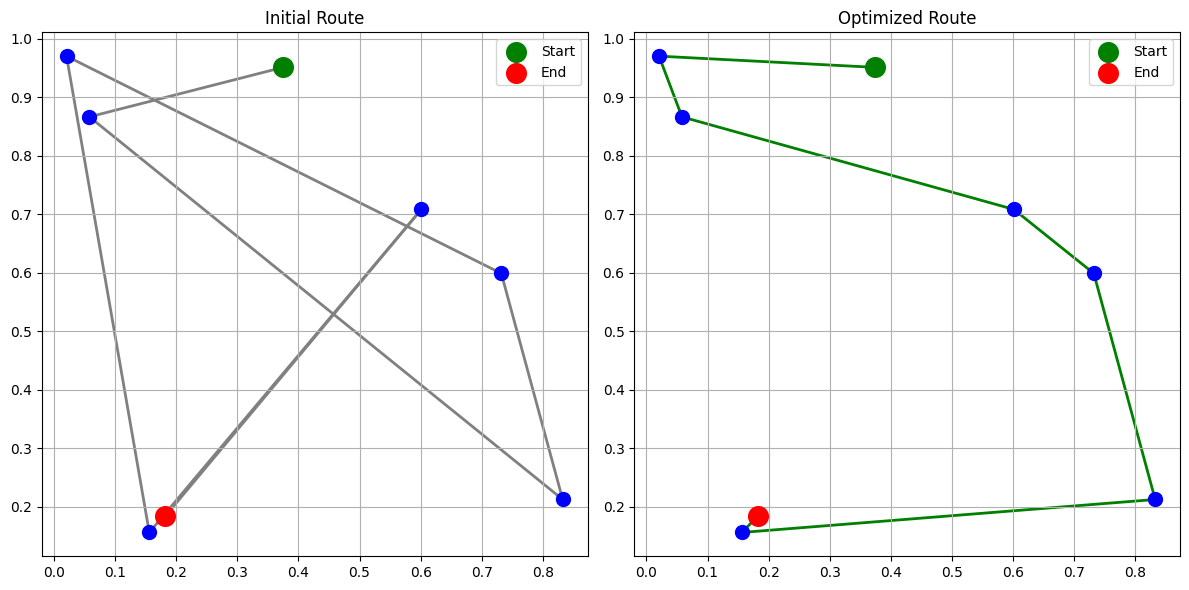

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Function to plot a route with arrows showing bus movement
def plot_route(stops, route, title, ax, color):
    ax.scatter(stops[:, 0], stops[:, 1], c='blue', s=100, zorder=2)
    for i in range(len(route) - 1):
        # Draw arrows from one stop to the next
        arrow = FancyArrowPatch(stops[route[i]], stops[route[i+1]], color=color, lw=2, arrowstyle='->')
        ax.add_patch(arrow)

    # Mark start and end points
    ax.scatter(stops[route[0], 0], stops[route[0], 1], c='green', s=200, label="Start", zorder=3)  # Start point
    ax.scatter(stops[route[-1], 0], stops[route[-1], 1], c='red', s=200, label="End", zorder=3)    # End point
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

# Function to calculate the total distance of a route
def calculate_route_distance(route, stops):
    dist = 0
    for i in range(len(route) - 1):
        dist += np.linalg.norm(stops[route[i]] - stops[route[i+1]])
    return dist

# Tabu Search optimization (simplified)
def tabu_search(stops, max_iters=100):
    n_stops = len(stops)
    # Start with a random initial route, keeping start and end fixed
    current_route = [0] + list(np.random.permutation(range(1, n_stops-1))) + [n_stops-1]
    best_route = current_route.copy()
    best_distance = calculate_route_distance(current_route, stops)

    tabu_list = []
    tabu_tenure = 10  # Number of iterations to keep moves in tabu list

    for _ in range(max_iters):
        # Generate neighborhood by swapping intermediate stops, keep start and end fixed
        neighborhood = []
        for i in range(1, n_stops-1):
            for j in range(i + 1, n_stops-1):
                neighbor = current_route.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                if (i, j) not in tabu_list:  # Avoid moves in tabu list
                    neighborhood.append(neighbor)

        # Select the best route in the neighborhood
        neighborhood_distances = [calculate_route_distance(route, stops) for route in neighborhood]
        best_neighbor_idx = np.argmin(neighborhood_distances)
        best_neighbor = neighborhood[best_neighbor_idx]
        best_neighbor_distance = neighborhood_distances[best_neighbor_idx]

        # Update the current route
        if best_neighbor_distance < best_distance:
            best_route = best_neighbor
            best_distance = best_neighbor_distance

        current_route = best_neighbor

        # Update tabu list
        tabu_list.append((i, j))
        if len(tabu_list) > tabu_tenure:
            tabu_list.pop(0)

    return best_route

# Example data: coordinates of 8 bus stops (fixed start and end points)
np.random.seed(42)
bus_stops = np.random.rand(8, 2)  # 8 random bus stops including start and end

# Initial and final routes
initial_route = [0] + list(np.random.permutation(range(1, len(bus_stops)-1))) + [len(bus_stops)-1]

# Run Tabu Search to get the optimized route
optimized_route = tabu_search(bus_stops, max_iters=50)

# Plotting the initial and optimized routes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot initial route with fixed start/end and arrows
plot_route(bus_stops, initial_route, "Initial Route", ax1, color='gray')

# Plot optimized route with fixed start/end and arrows
plot_route(bus_stops, optimized_route, "Optimized Route", ax2, color='green')

plt.tight_layout()
plt.show()


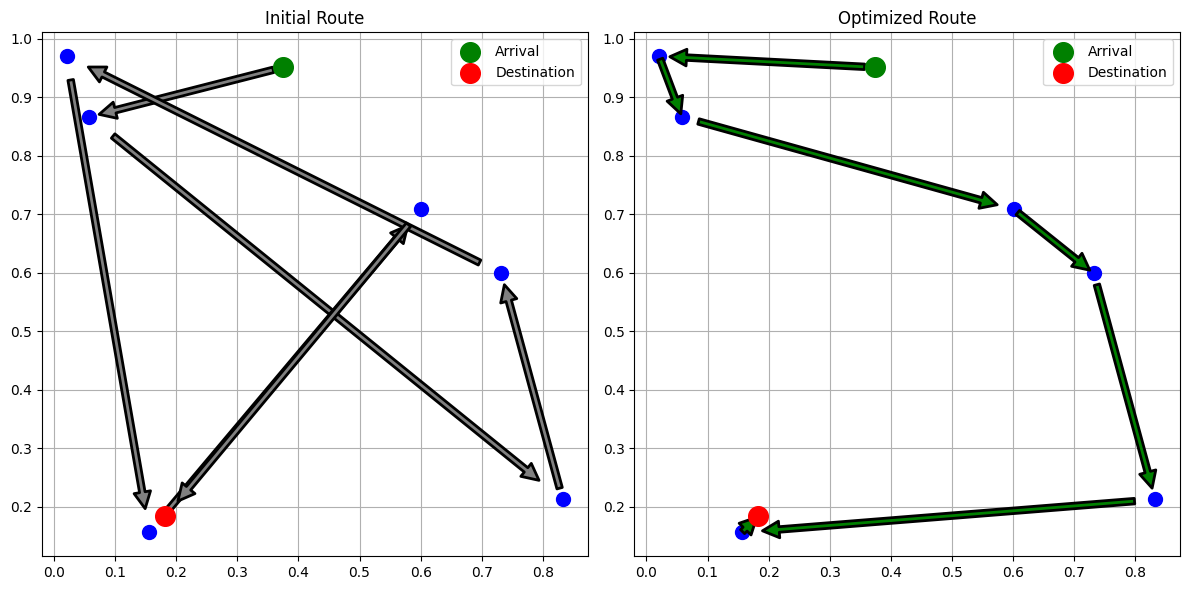

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Function to plot a route with arrows showing bus movement
def plot_route_with_arrows(stops, route, title, ax, color):
    ax.scatter(stops[:, 0], stops[:, 1], c='blue', s=100, zorder=2)
    for i in range(len(route) - 1):
        # Draw arrows from one stop to the next
        start_stop = stops[route[i]]
        next_stop = stops[route[i + 1]]
        ax.annotate(
            '', 
            xy=(next_stop[0], next_stop[1]), 
            xytext=(start_stop[0], start_stop[1]),
            arrowprops=dict(facecolor=color, shrink=0.05, lw=2)
        )

    # Mark start and end points
    ax.scatter(stops[route[0], 0], stops[route[0], 1], c='green', s=200, label="Arrival", zorder=3)  # Arrival point
    ax.scatter(stops[route[-1], 0], stops[route[-1], 1], c='red', s=200, label="Destination", zorder=3)  # Destination point
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

# Function to calculate the total distance of a route
def calculate_route_distance(route, stops):
    dist = 0
    for i in range(len(route) - 1):
        dist += np.linalg.norm(stops[route[i]] - stops[route[i+1]])
    return dist

# Tabu Search optimization (simplified)
def tabu_search(stops, max_iters=100):
    n_stops = len(stops)
    # Start with a random initial route, keeping arrival and destination fixed
    current_route = [0] + list(np.random.permutation(range(1, n_stops-1))) + [n_stops-1]
    best_route = current_route.copy()
    best_distance = calculate_route_distance(current_route, stops)

    tabu_list = []
    tabu_tenure = 10  # Number of iterations to keep moves in tabu list

    for _ in range(max_iters):
        # Generate neighborhood by swapping intermediate stops, keep arrival and destination fixed
        neighborhood = []
        for i in range(1, n_stops-1):
            for j in range(i + 1, n_stops-1):
                neighbor = current_route.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                if (i, j) not in tabu_list:  # Avoid moves in tabu list
                    neighborhood.append(neighbor)

        # Select the best route in the neighborhood
        neighborhood_distances = [calculate_route_distance(route, stops) for route in neighborhood]
        best_neighbor_idx = np.argmin(neighborhood_distances)
        best_neighbor = neighborhood[best_neighbor_idx]
        best_neighbor_distance = neighborhood_distances[best_neighbor_idx]

        # Update the current route
        if best_neighbor_distance < best_distance:
            best_route = best_neighbor
            best_distance = best_neighbor_distance

        current_route = best_neighbor

        # Update tabu list
        tabu_list.append((i, j))
        if len(tabu_list) > tabu_tenure:
            tabu_list.pop(0)

    return best_route

# Example data: coordinates of 8 bus stops (fixed arrival and destination points)
np.random.seed(42)
bus_stops = np.random.rand(8, 2)  # 8 random bus stops including arrival and destination

# Initial and final routes
initial_route = [0] + list(np.random.permutation(range(1, len(bus_stops)-1))) + [len(bus_stops)-1]

# Run Tabu Search to get the optimized route
optimized_route = tabu_search(bus_stops, max_iters=50)

# Plotting the initial and optimized routes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot initial route with arrows showing movement
plot_route_with_arrows(bus_stops, initial_route, "Initial Route", ax1, color='gray')

# Plot optimized route with arrows showing movement
plot_route_with_arrows(bus_stops, optimized_route, "Optimized Route", ax2, color='green')

plt.tight_layout()
plt.show()


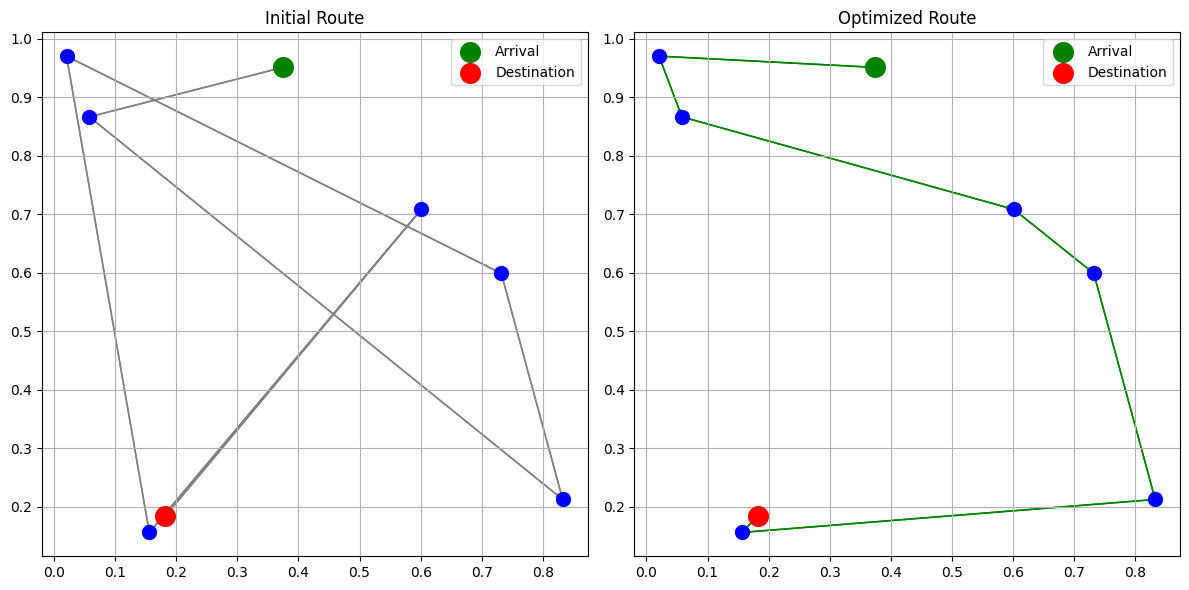

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot a route with thin lines and arrows at the end showing bus movement
def plot_route_with_arrows(stops, route, title, ax, color):
    ax.scatter(stops[:, 0], stops[:, 1], c='blue', s=100, zorder=2)
    
    for i in range(len(route) - 1):
        start_stop = stops[route[i]]
        next_stop = stops[route[i + 1]]
        
        # Plot thin lines between stops
        ax.plot([start_stop[0], next_stop[0]], [start_stop[1], next_stop[1]], color=color, lw=1, zorder=1)
        
        # Add arrows at the end of each line segment
        ax.quiver(start_stop[0], start_stop[1], next_stop[0] - start_stop[0], next_stop[1] - start_stop[1], 
                  angles='xy', scale_units='xy', scale=1, color=color, width=0.003)

    # Mark start and end points
    ax.scatter(stops[route[0], 0], stops[route[0], 1], c='green', s=200, label="Arrival", zorder=3)  # Arrival point
    ax.scatter(stops[route[-1], 0], stops[route[-1], 1], c='red', s=200, label="Destination", zorder=3)  # Destination point
    
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

# Function to calculate the total distance of a route
def calculate_route_distance(route, stops):
    dist = 0
    for i in range(len(route) - 1):
        dist += np.linalg.norm(stops[route[i]] - stops[route[i+1]])
    return dist

# Tabu Search optimization (simplified)
def tabu_search(stops, max_iters=100):
    n_stops = len(stops)
    # Start with a random initial route, keeping arrival and destination fixed
    current_route = [0] + list(np.random.permutation(range(1, n_stops-1))) + [n_stops-1]
    best_route = current_route.copy()
    best_distance = calculate_route_distance(current_route, stops)

    tabu_list = []
    tabu_tenure = 10  # Number of iterations to keep moves in tabu list

    for _ in range(max_iters):
        # Generate neighborhood by swapping intermediate stops, keep arrival and destination fixed
        neighborhood = []
        for i in range(1, n_stops-1):
            for j in range(i + 1, n_stops-1):
                neighbor = current_route.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                if (i, j) not in tabu_list:  # Avoid moves in tabu list
                    neighborhood.append(neighbor)

        # Select the best route in the neighborhood
        neighborhood_distances = [calculate_route_distance(route, stops) for route in neighborhood]
        best_neighbor_idx = np.argmin(neighborhood_distances)
        best_neighbor = neighborhood[best_neighbor_idx]
        best_neighbor_distance = neighborhood_distances[best_neighbor_idx]

        # Update the current route
        if best_neighbor_distance < best_distance:
            best_route = best_neighbor
            best_distance = best_neighbor_distance

        current_route = best_neighbor

        # Update tabu list
        tabu_list.append((i, j))
        if len(tabu_list) > tabu_tenure:
            tabu_list.pop(0)

    return best_route

# Example data: coordinates of 8 bus stops (fixed arrival and destination points)
np.random.seed(42)
bus_stops = np.random.rand(8, 2)  # 8 random bus stops including arrival and destination

# Initial and final routes
initial_route = [0] + list(np.random.permutation(range(1, len(bus_stops)-1))) + [len(bus_stops)-1]

# Run Tabu Search to get the optimized route
optimized_route = tabu_search(bus_stops, max_iters=50)

# Plotting the initial and optimized routes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot initial route with thin lines and arrows
plot_route_with_arrows(bus_stops, initial_route, "Initial Route", ax1, color='gray')

# Plot optimized route with thin lines and arrows
plot_route_with_arrows(bus_stops, optimized_route, "Optimized Route", ax2, color='green')

plt.tight_layout()
plt.show()


Initial Distance: 4.91 units
Optimized Distance: 2.32 units


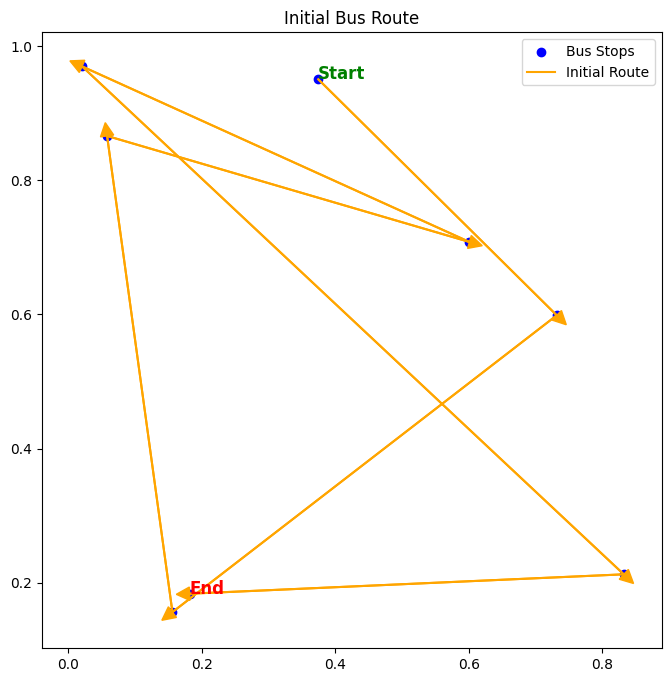

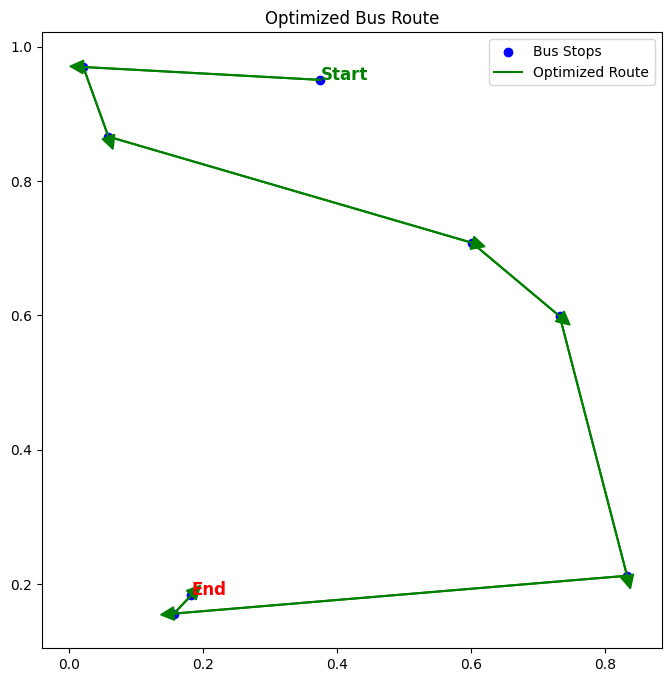

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random bus stops (x, y coordinates)
def generate_bus_stops(num_stops, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_stops, 2)

# Calculate the total distance of the bus route
def total_distance(route, stops):
    distance = 0
    for i in range(len(route) - 1):
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        distance += np.linalg.norm(stop_a - stop_b)
    return distance

# Swap two stops in the route to create a new neighbor
def swap(route, i, j):
    new_route = route.copy()
    new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route

# Tabu Search Algorithm for route optimization
def tabu_search(stops, start_idx, end_idx, max_iterations=1000, tabu_size=100):
    num_stops = len(stops)
    
    # Initial route (excluding start and end points)
    initial_route = list(range(num_stops))
    initial_route.remove(start_idx)
    initial_route.remove(end_idx)
    initial_route = [start_idx] + initial_route + [end_idx]
    
    current_route = initial_route.copy()
    best_route = current_route
    best_distance = total_distance(current_route, stops)
    
    tabu_list = []
    iteration = 0
    
    while iteration < max_iterations:
        neighborhood = []
        
        # Generate neighborhood by swapping two stops
        for i in range(1, num_stops - 2):  # Avoid changing start and end points
            for j in range(i + 1, num_stops - 1):
                neighbor = swap(current_route, i, j)
                if neighbor not in tabu_list:
                    neighborhood.append(neighbor)
        
        # Find the best neighbor
        best_neighbor = None
        best_neighbor_distance = float('inf')
        
        for neighbor in neighborhood:
            dist = total_distance(neighbor, stops)
            if dist < best_neighbor_distance:
                best_neighbor_distance = dist
                best_neighbor = neighbor
        
        # Move to the best neighbor
        current_route = best_neighbor
        current_distance = best_neighbor_distance
        
        # Update best solution found
        if current_distance < best_distance:
            best_route = current_route
            best_distance = current_distance
        
        # Update Tabu List
        tabu_list.append(current_route)
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)
        
        iteration += 1
    
    return best_route, best_distance

# Plot the initial route
def plot_initial_route(stops, route, start_idx, end_idx):
    plt.figure(figsize=(8, 8))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")
    
    # Mark the start and end stops
    plt.text(stops[start_idx, 0], stops[start_idx, 1], "Start", color='green', fontsize=12, fontweight='bold')
    plt.text(stops[end_idx, 0], stops[end_idx, 1], "End", color='red', fontsize=12, fontweight='bold')
    
    # Plot the initial route with arrows
    for i in range(len(route) - 1):
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'orange', label="Initial Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.02, head_length=0.02, fc='orange', ec='orange')
    
    plt.title("Initial Bus Route")
    plt.legend()
    plt.show()

# Plot the optimized route
def plot_optimized_route(stops, route, start_idx, end_idx):
    plt.figure(figsize=(8, 8))
    plt.scatter(stops[:, 0], stops[:, 1], c='blue', marker='o', label="Bus Stops")
    
    # Mark the start and end stops
    plt.text(stops[start_idx, 0], stops[start_idx, 1], "Start", color='green', fontsize=12, fontweight='bold')
    plt.text(stops[end_idx, 0], stops[end_idx, 1], "End", color='red', fontsize=12, fontweight='bold')
    
    # Plot the optimized route with arrows
    for i in range(len(route) - 1):
        stop_a = stops[route[i]]
        stop_b = stops[route[i + 1]]
        plt.plot([stop_a[0], stop_b[0]], [stop_a[1], stop_b[1]], 'green', label="Optimized Route" if i == 0 else "")
        plt.arrow(stop_a[0], stop_a[1], stop_b[0] - stop_a[0], stop_b[1] - stop_a[1], 
                  head_width=0.02, head_length=0.02, fc='green', ec='green')
    
    plt.title("Optimized Bus Route")
    plt.legend()
    plt.show()

# Main function to run the route optimization
if __name__ == "__main__":
    num_stops = 8  # Number of bus stops
    bus_stops = generate_bus_stops(num_stops)

    # Define start and end points
    start_idx = 0
    end_idx = num_stops - 1

    # Random initial route with start and end points
    initial_route = [start_idx] + list(range(1, num_stops - 1)) + [end_idx]

    # Optimize the bus route using Tabu Search
    optimized_route, optimized_distance = tabu_search(bus_stops, start_idx, end_idx, max_iterations=200, tabu_size=50)
    initial_distance = total_distance(initial_route, bus_stops)

    print(f"Initial Distance: {initial_distance:.2f} units")
    print(f"Optimized Distance: {optimized_distance:.2f} units")

    # Plot the initial and optimized routes separately
    plot_initial_route(bus_stops, initial_route, start_idx, end_idx)
    plot_optimized_route(bus_stops, optimized_route, start_idx, end_idx)
